purpose: follow up to PCA_phenotypes_nicsa. As those phenotypes did not work well in making a unified phenotype, this time I only used traits that have qtls, as well as looking at genetic correlation matrix to define phenotypes, using heirarchical clustering.

# set-up

In [2]:
import pandas as pd
import os
from pca import pca
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import ward, dendrogram, leaves_list, linkage
from scipy.spatial import distance

In [3]:
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

In [4]:
nicsa_traits=pd.read_csv('/tscc/projects/ps-palmer/brittany/SUD_cross_species/scripts/nicsa_traits.csv')

# filter traits for qtls

In [4]:
aqtl=pd.read_csv('nicsa_gwas/results/qtls/allQTLS.csv')
qtl=pd.read_csv('nicsa_gwas/results/qtls/finalqtlannotated.csv')

In [5]:
len(aqtl)==len(qtl)
#annotated final==qtl but after snpeff annotation (i think)

True

In [6]:
qtl_t=se t(qtl.trait)
#remove the PCA analysis and UMAP traits
qtl_t={x for x in qtl_t if ('pc' not in x) and ('umap' not in x)}

In [7]:
qtl_inactive={x for x in qtl_t if ('inactivelick' in x)}
qtl_inactive

{'nicsa_day10_inactivelick',
 'nicsa_day1_inactivelick',
 'nicsa_day3_inactivelick',
 'nicsa_day4_inactivelick',
 'nicsa_day9_inactivelick',
 'nicsa_total_inactivelick_10days'}

In [8]:
qtl_t=qtl_t-qtl_inactive

In [9]:
qtl_t = [x[len('nicsa_'):] if x.startswith('nicsa_') else x for x in qtl_t]

In [10]:
qtl_t

['day8_active_inactive_ratio',
 'active_inactive_ratio_last_three_median',
 'first_three_days_infusion_median',
 'day6_activelick',
 'day11_activelick',
 'day6_infusion',
 'day6_active_inactive_ratio',
 'last_three_days_infusion_median',
 'day11_active_inactive_ratio',
 'day5_infusion',
 'total_activelick_10days',
 'day4_active_inactive_ratio',
 'active_inactive_ratio_all_days',
 'day4_activelick',
 'day1_infusion',
 'day3_activelick',
 'total_infusion_10days',
 'day1_activelick',
 'day2_activelick',
 'day8_infusion',
 'day2_infusion',
 'slope_nicotine_infusion',
 'day8_activelick',
 'day3_active_inactive_ratio',
 'day11_infusion',
 'day4_infusion']

In [11]:
nicsa_traits['qtl'] = nicsa_traits['trait'].apply(lambda x: True if x in qtl_t else False)

In [12]:
f=((nicsa_traits['parallel']=='cigday') & (nicsa_traits['qtl']==True) )

# import phenotypic data

In [6]:
phenopath='nicsa_gwas/data/pheno/'

In [14]:
pheno=pd.read_csv('allpheno.txt',sep='\t',header=None)

In [15]:
#N rats in combined file
len(pheno)

2018

In [225]:
tbl=nicsa_traits[nicsa_traits['qtl']==True]

In [226]:
if 'tbl_cigday' in locals(): 
    del(tbl_cigday)
if 'tbl_smkinit' in locals(): 
    del(tbl_smkinit)
if 'tbl_qtl' in locals(): 
    del(tbl_qtl)
if 'tbl_inactive' in locals(): 
    del(tbl_inactive)   

In [227]:
#I'm going to have to regenerate all of these because I accidentally fucking deleted them like an IDIOT
for f in os.listdir(phenopath):
    if f.endswith('.txt'):
        label=(f[18: (len(f)-4)]) 
        #print(label)
        t=pd.read_csv(phenopath+f,sep=' ',header=None)
        if len(t.columns)==4:
            t=t[[1,2,3]]
        t.columns=['family','RFID',label]
        if (label in list(tbl[tbl.parallel=='cigday'].trait)):
            print(label +' in cigday')
            if 'tbl_cigday' in globals():
                tbl_cigday=tbl_cigday.merge(t[['RFID',label]],on='RFID')
                print('# rats for '+f+': '+str(len(t)))
                print('# rats for tbl_cigday'+': '+str(len(tbl_cigday)))
            else:
                tbl_cigday=t[['RFID',label]]
        elif (label in list(tbl[tbl.parallel!='cigday'].trait)):
            print(label +' in smkinit')
            if 'tbl_smkinit' in globals():
                tbl_smkinit=tbl_smkinit.merge(t[['RFID',label]],on='RFID')
                print('# rats for '+f+': '+str(len(t)))
                print('# rats for tbl_smkinit'+': '+str(len(tbl_smkinit)))
            else:
                tbl_smkinit=t[['RFID',label]]
        elif (label in qtl_t):
            print(label +' has a qtl and is not an inactive lick trait')
            if 'tbl_qtl' in globals():
                tbl_qtl=tbl_qtl.merge(t[['RFID',label]],on='RFID')
                print('# rats for '+f+': '+str(len(t)))
                print('# rats for tbl_qtl'+': '+str(len(tbl_qtl)))
            else:
                tbl_qtl=t[['RFID',label]]
        elif (label in qtl_inactive):
            print(label +' has a qtl and is an inactive lick trait')
            if 'tbl_inactive' in globals():
                tbl_inactive=tbl_qtl.merge(t[['RFID',label]],on='RFID')
                print('# rats for '+f+': '+str(len(t)))
                print('# rats for tbl_inactive'+': '+str(len(tbl_inactive)))
            else:
                tbl_inactive=t[['RFID',label]]
        else:
            print(label+' not in nicsa traits table')

 not in nicsa traits table
day1_inactivelick not in nicsa traits table
day2_inactivelick not in nicsa traits table
day11_active_inactive_ratio has a qtl and is not an inactive lick trait
first_three_days_infusion_median in smkinit
day7_infusion not in nicsa traits table
total_inactivelick_10days not in nicsa traits table
_pc1_no_covariate not in nicsa traits table
active_inactive_ratio_all_days in cigday
slope_nicotine_infusion has a qtl and is not an inactive lick trait
# rats for regressedlr_nicsa_slope_nicotine_infusion.txt: 2018
# rats for tbl_qtl: 2018
lusters_0 not in nicsa traits table
day3_infusion not in nicsa traits table
day7_activelick not in nicsa traits table
day10_active_inactive_ratio not in nicsa traits table
lusters_1 not in nicsa traits table
day3_active_inactive_ratio has a qtl and is not an inactive lick trait
# rats for regressedlr_nicsa_day3_active_inactive_ratio.txt: 2018
# rats for tbl_qtl: 2018
day7_inactivelick not in nicsa traits table
 not in nicsa traits t

# genetic correlation heirarchical clustering

there is some issue with the dendogram function that causes the one that's generated in the function to not align with the one generated separately. I think it's because the optimal orientation is not calculated for the one that's generated separately. HOWEVER, when you try to align some of the dendograms that were calculated separately onto the correlation matrix it does not align properly (based on the separate graphing), so I trust the one that's generated with the graphing.

In [19]:
#read in the genetic correlation tables
outgp=pd.read_csv('nicsa_gwas/results_run1/heritability/genetic_correlation_matrix.csv',index_col=0)
outg=pd.read_csv('nicsa_gwas/results_run1/heritability/genetic_correlation_matrix_justgenetic.csv',index_col=0)

In [20]:
#filter for traits of interest (i.e. remove control traits and compounded traits)
outg_filt=outg[(~outg.index.str.contains('umap'))&(~outg.index.str.contains('pc'))&(~outg.index.str.contains('inactivelick'))]
outg_filt=outg_filt.loc[:, outg_filt.columns.isin(outg_filt.index)]
outgp_filt=outgp[outgp.index.isin(outg_filt.index)]
outgp_filt=outgp_filt.loc[:, outgp_filt.columns.isin(outg_filt.index)]

In [21]:
#filter for only traits of interest that also have qtls
qtl_t_full=['nicsa_'+ s for s in qtl_t]
outg_filt_qtl=outg_filt[outgp_filt.index.isin(qtl_t_full)]
outg_filt_qtl=outg_filt_qtl.loc[:, outg_filt_qtl.columns.isin(qtl_t_full)]
outgp_filt_qtl=outgp_filt[outgp_filt.index.isin(qtl_t_full)]
outgp_filt_qtl=outgp_filt_qtl.loc[:, outgp_filt_qtl.columns.isin(qtl_t_full)]

In [22]:
#filter for NICSA traits recommended by Hao Chen that have QTLs
nicsa_traits_full=['nicsa_'+ s for s in nicsa_traits.trait]
outg_filt_hc=outg_filt_qtl[outg_filt_qtl.index.isin(nicsa_traits_full)]
outg_filt_hc=outg_filt_hc.loc[:, outg_filt_hc.columns.isin(nicsa_traits_full)]
outgp_filt_hc=outgp_filt_qtl[outgp_filt_qtl.index.isin(nicsa_traits_full)]
outgp_filt_hc=outgp_filt_hc.loc[:, outgp_filt_hc.columns.isin(nicsa_traits_full)]

In [23]:
#all traits
hieg = linkage(distance.pdist(outg.applymap(lambda x: float(x.split('+-')[0]))),method='single', metric='euclidean') #method='average'
lk = leaves_list(hieg)
#traits of interest
hieg_f = linkage(distance.pdist(outg_filt.applymap(lambda x: float(x.split('+-')[0])))) #method='average'
lk_f = leaves_list(hieg_f)
#traits of interest with QTLs
hieg_qtl = linkage(distance.pdist(outg_filt_qtl.applymap(lambda x: float(x.split('+-')[0])))) #method='average'
lk_f = leaves_list(hieg_qtl)
#only traits recommended by Hao with QTLs
hieg_hc = linkage(distance.pdist(outg_filt_hc.applymap(lambda x: float(x.split('+-')[0])))) #method='average'
lk_hc = leaves_list(hieg_hc)

In [24]:
hieg_qtl

array([[23.        , 24.        ,  0.19056989,  2.        ],
       [12.        , 13.        ,  0.21470224,  2.        ],
       [15.        , 16.        ,  0.24056131,  2.        ],
       [ 9.        , 10.        ,  0.26199213,  2.        ],
       [20.        , 21.        ,  0.27967502,  2.        ],
       [17.        , 18.        ,  0.28149229,  2.        ],
       [ 8.        , 29.        ,  0.33013146,  3.        ],
       [ 0.        ,  1.        ,  0.33877567,  2.        ],
       [ 3.        ,  7.        ,  0.38119054,  2.        ],
       [22.        , 26.        ,  0.40191647,  3.        ],
       [28.        , 35.        ,  0.40732022,  5.        ],
       [ 5.        ,  6.        ,  0.40791078,  2.        ],
       [30.        , 36.        ,  0.4728127 ,  7.        ],
       [11.        , 31.        ,  0.48326317,  3.        ],
       [ 2.        , 27.        ,  0.48907373,  3.        ],
       [ 4.        , 37.        ,  0.53129643,  3.        ],
       [34.        , 41.

## all traits

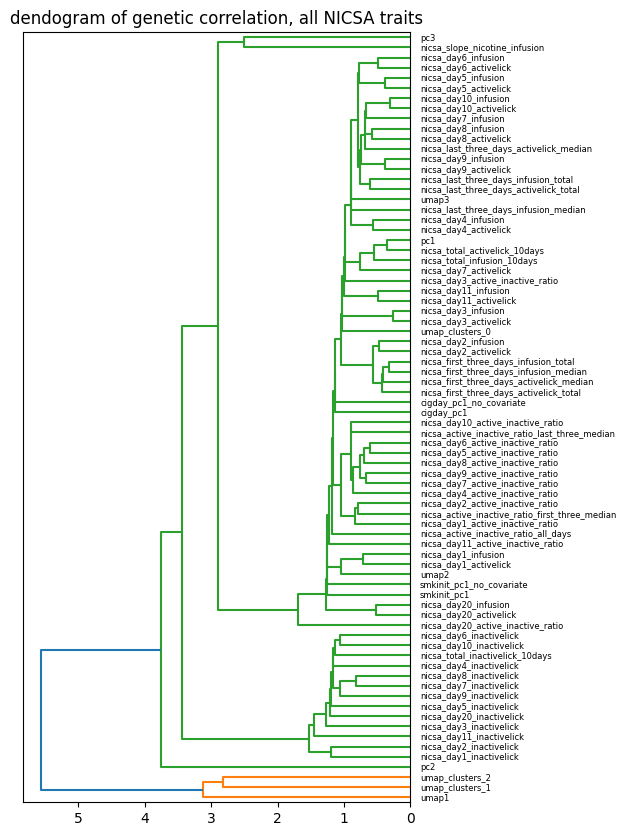

In [25]:
fig = plt.figure(figsize=(5, 10))
dn = dendrogram(hieg,labels=outg.index, orientation='left')
dn=plt.title('dendogram of genetic correlation, all NICSA traits')

/tscc/nfs/home/bsleger/miniconda3/envs/env-std-py38/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


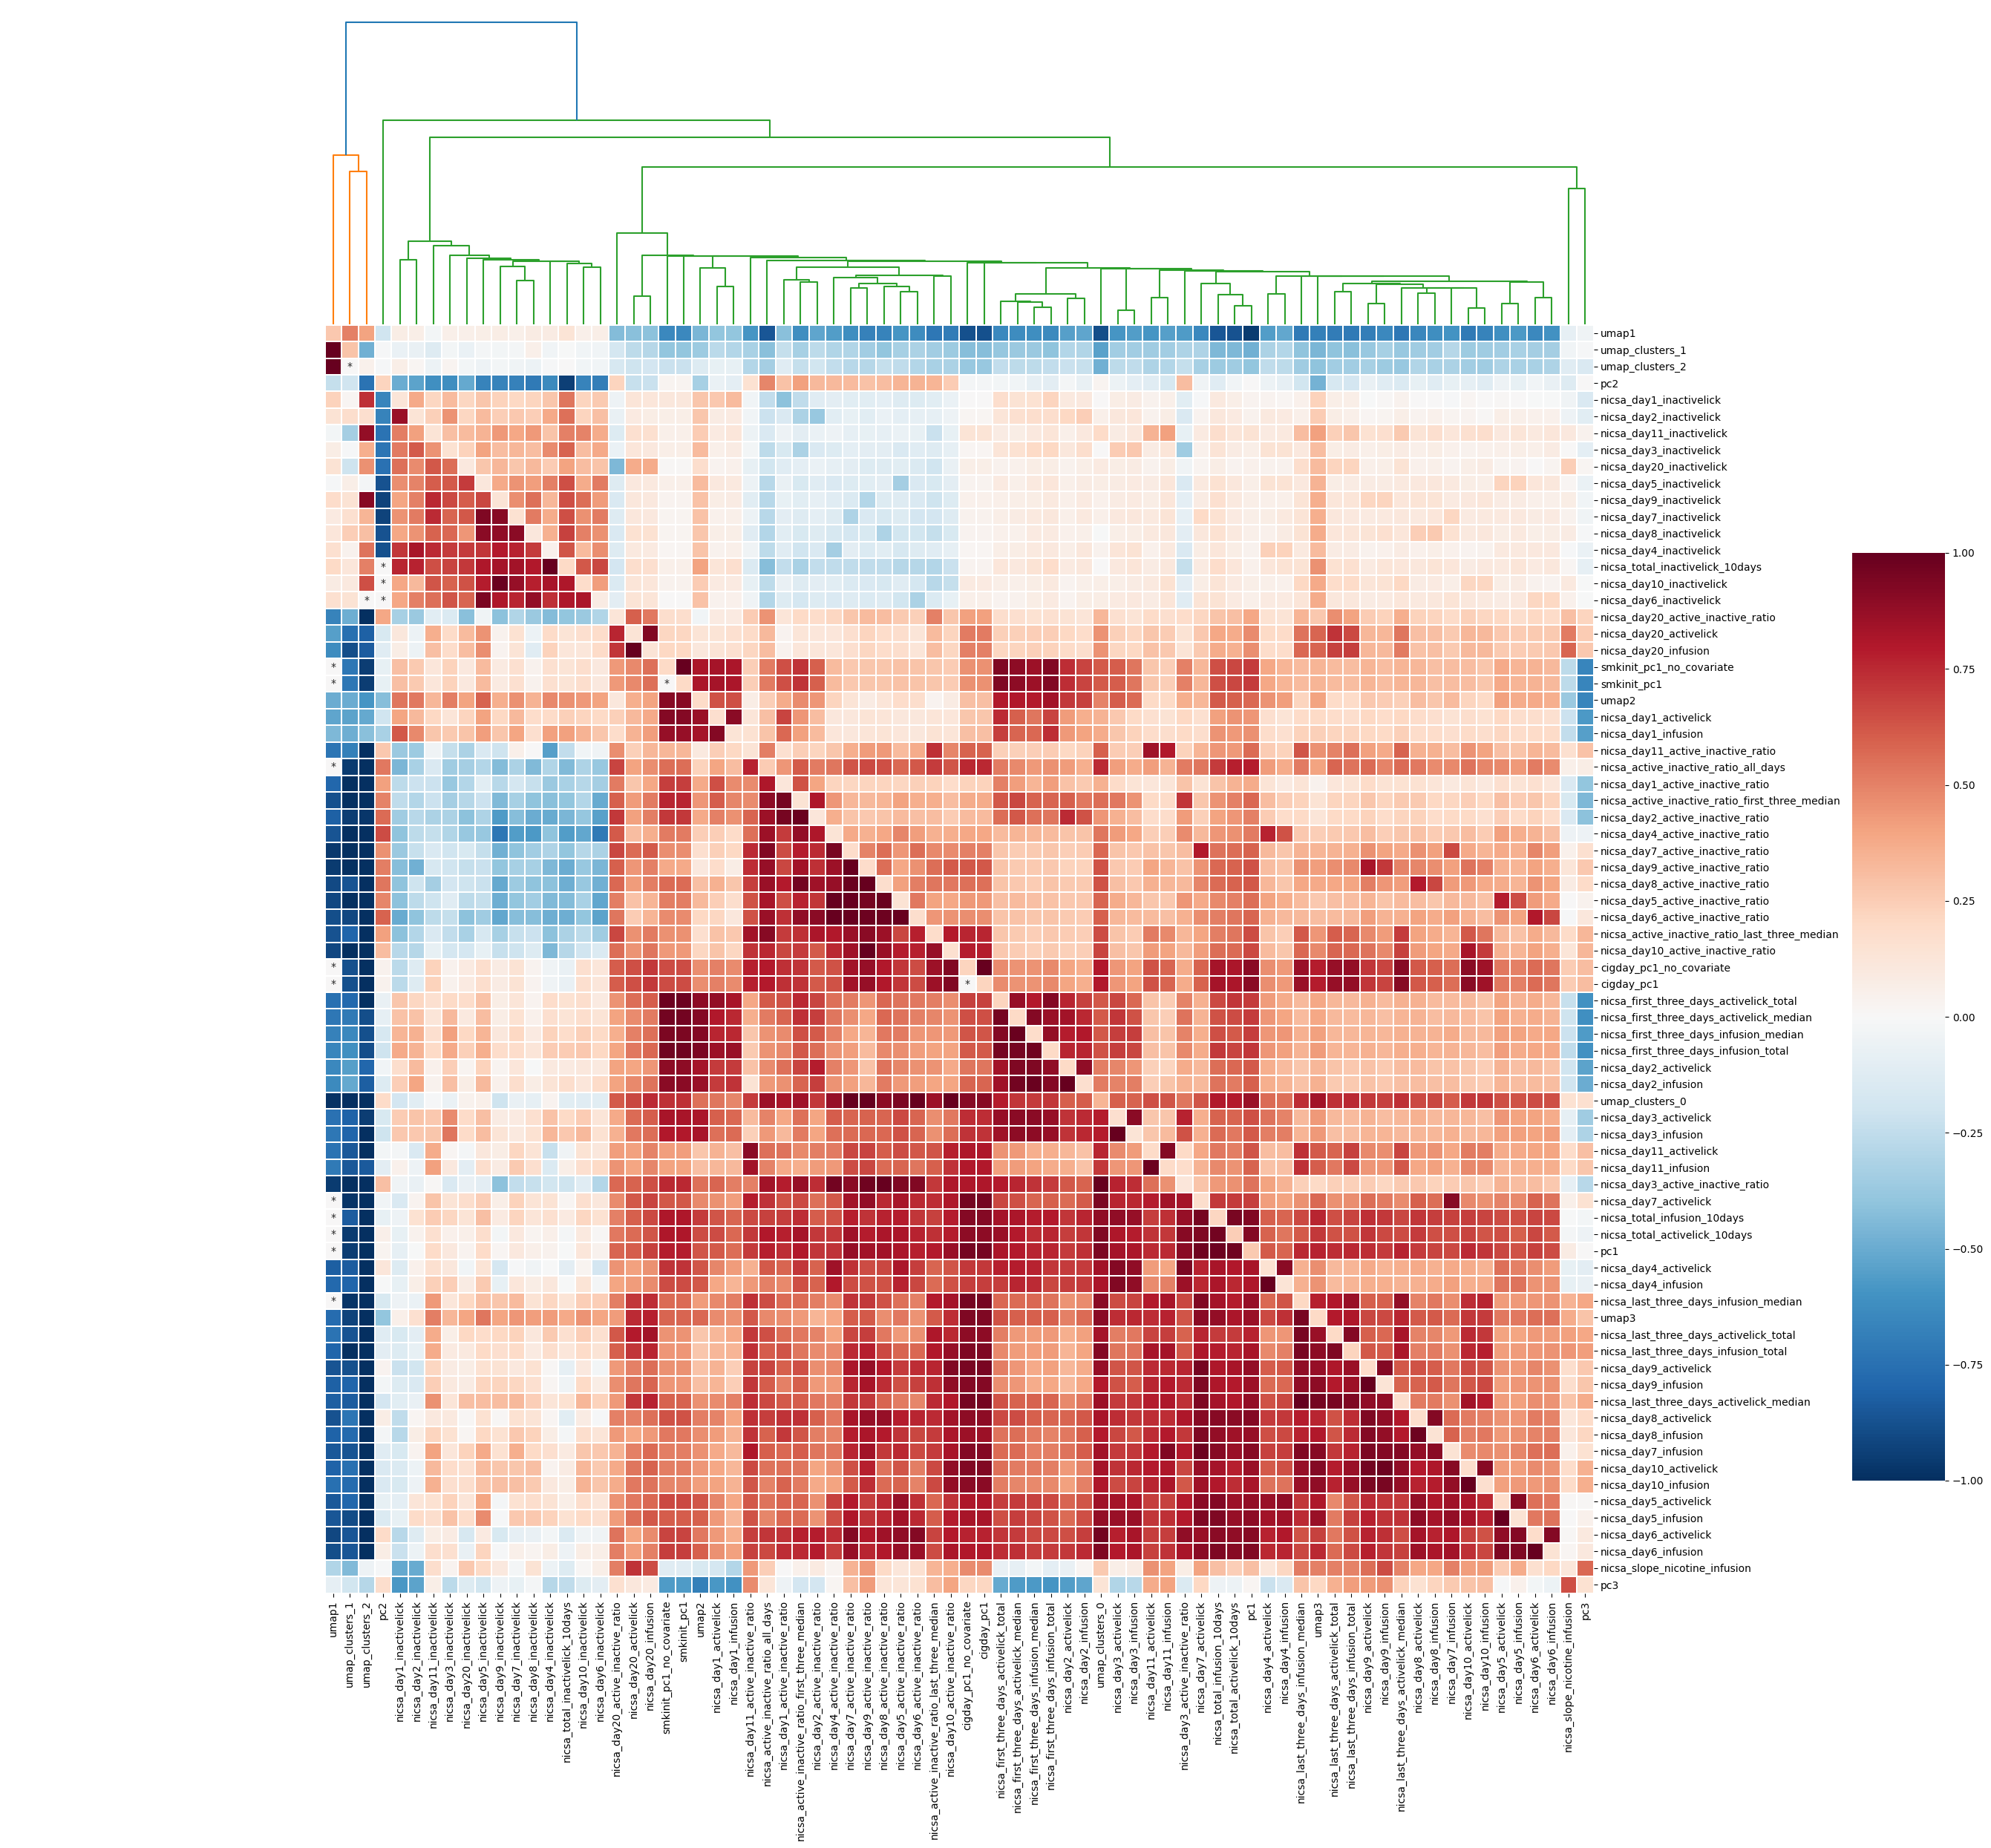

In [26]:
a = sns.clustermap(outgp.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= False, row_cluster=False,method='single', metric='euclidean',
        annot=outgp.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3, figsize=(25, 25) )
dendrogram(hieg, ax = a.ax_col_dendrogram)
a.ax_cbar.set_position([1, .2, .05, 0.5])
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')

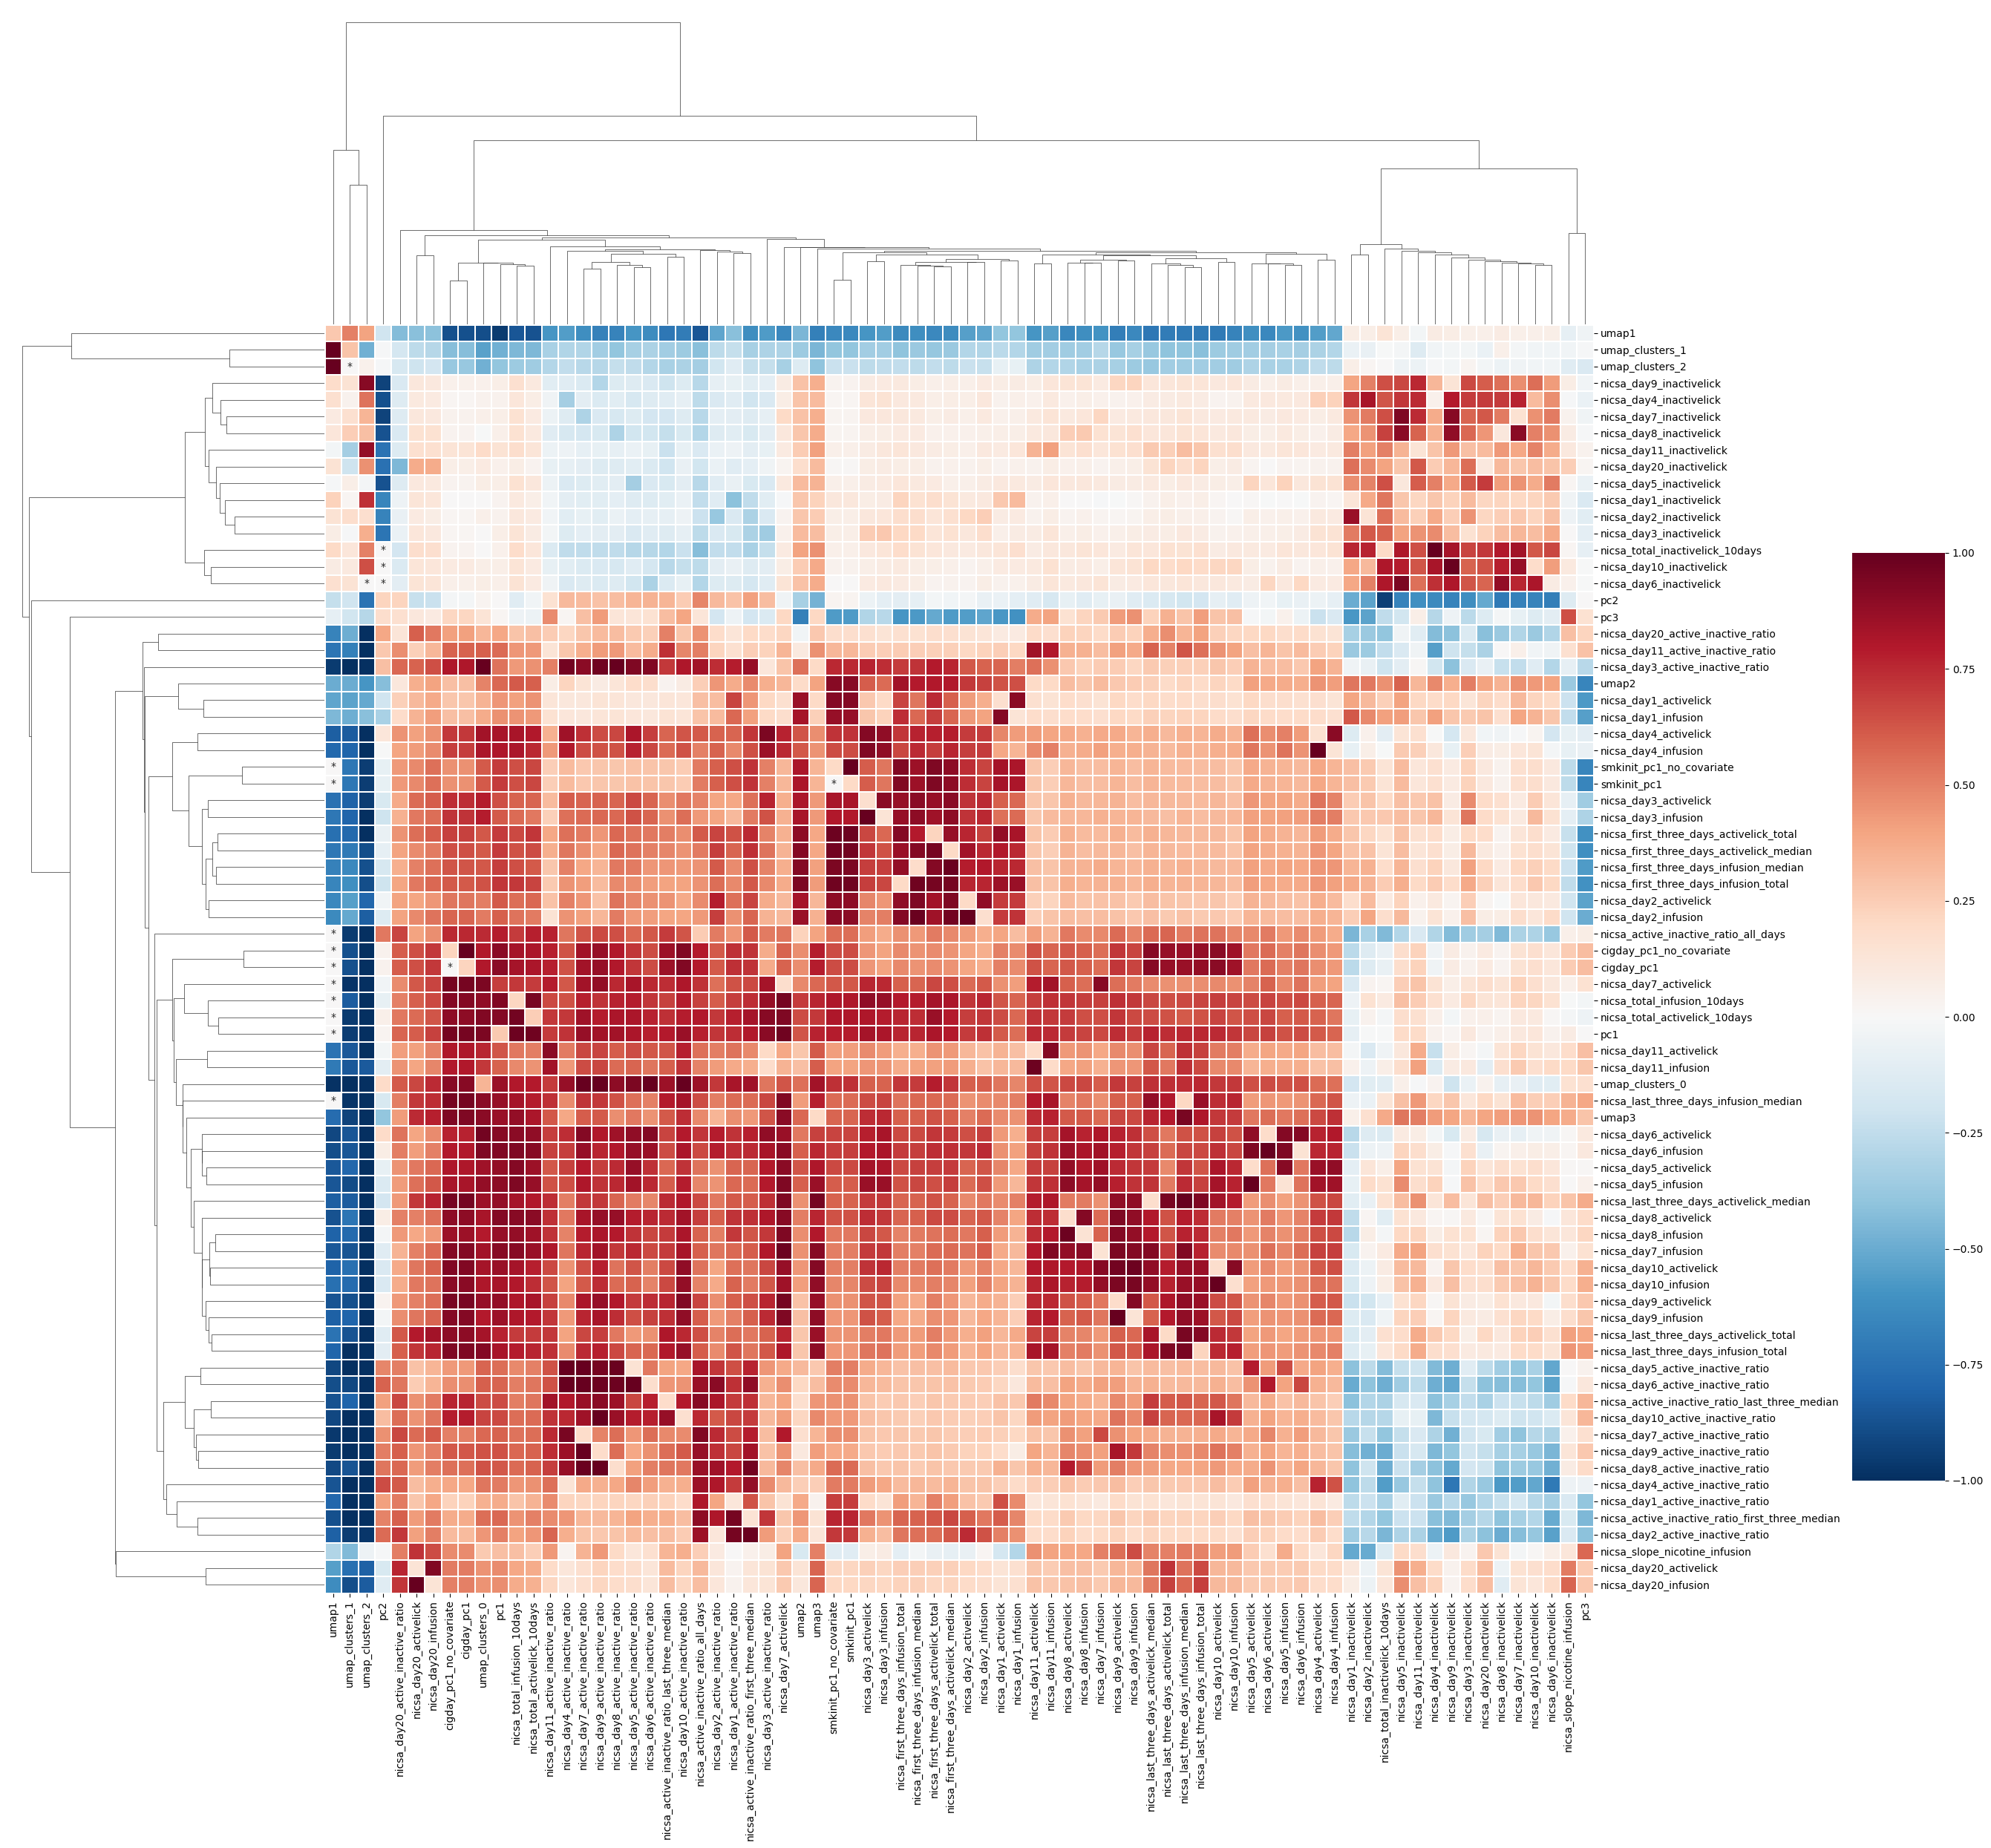

In [27]:
a = sns.clustermap(outgp.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= True, row_cluster=True,method='single', metric='euclidean',
        annot=outgp.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3, figsize=(25, 25) )
#dendrogram(hieg, ax = a.ax_col_dendrogram)
a.ax_cbar.set_position([1, .2, .05, 0.5])
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')

## non-control and combined traits

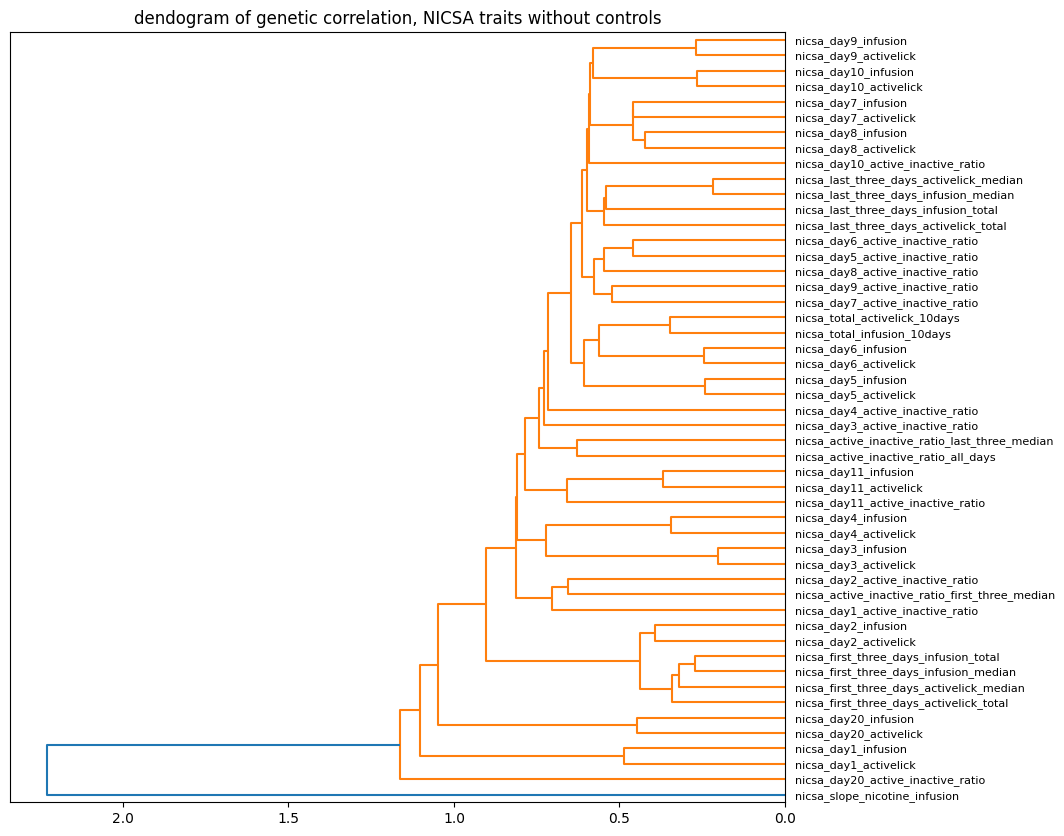

In [28]:
fig = plt.figure(figsize=(10, 10))
dn=plt.title('dendogram of genetic correlation, NICSA traits without controls')
dn = dendrogram(hieg_f,labels=outg_filt.index, orientation='left')

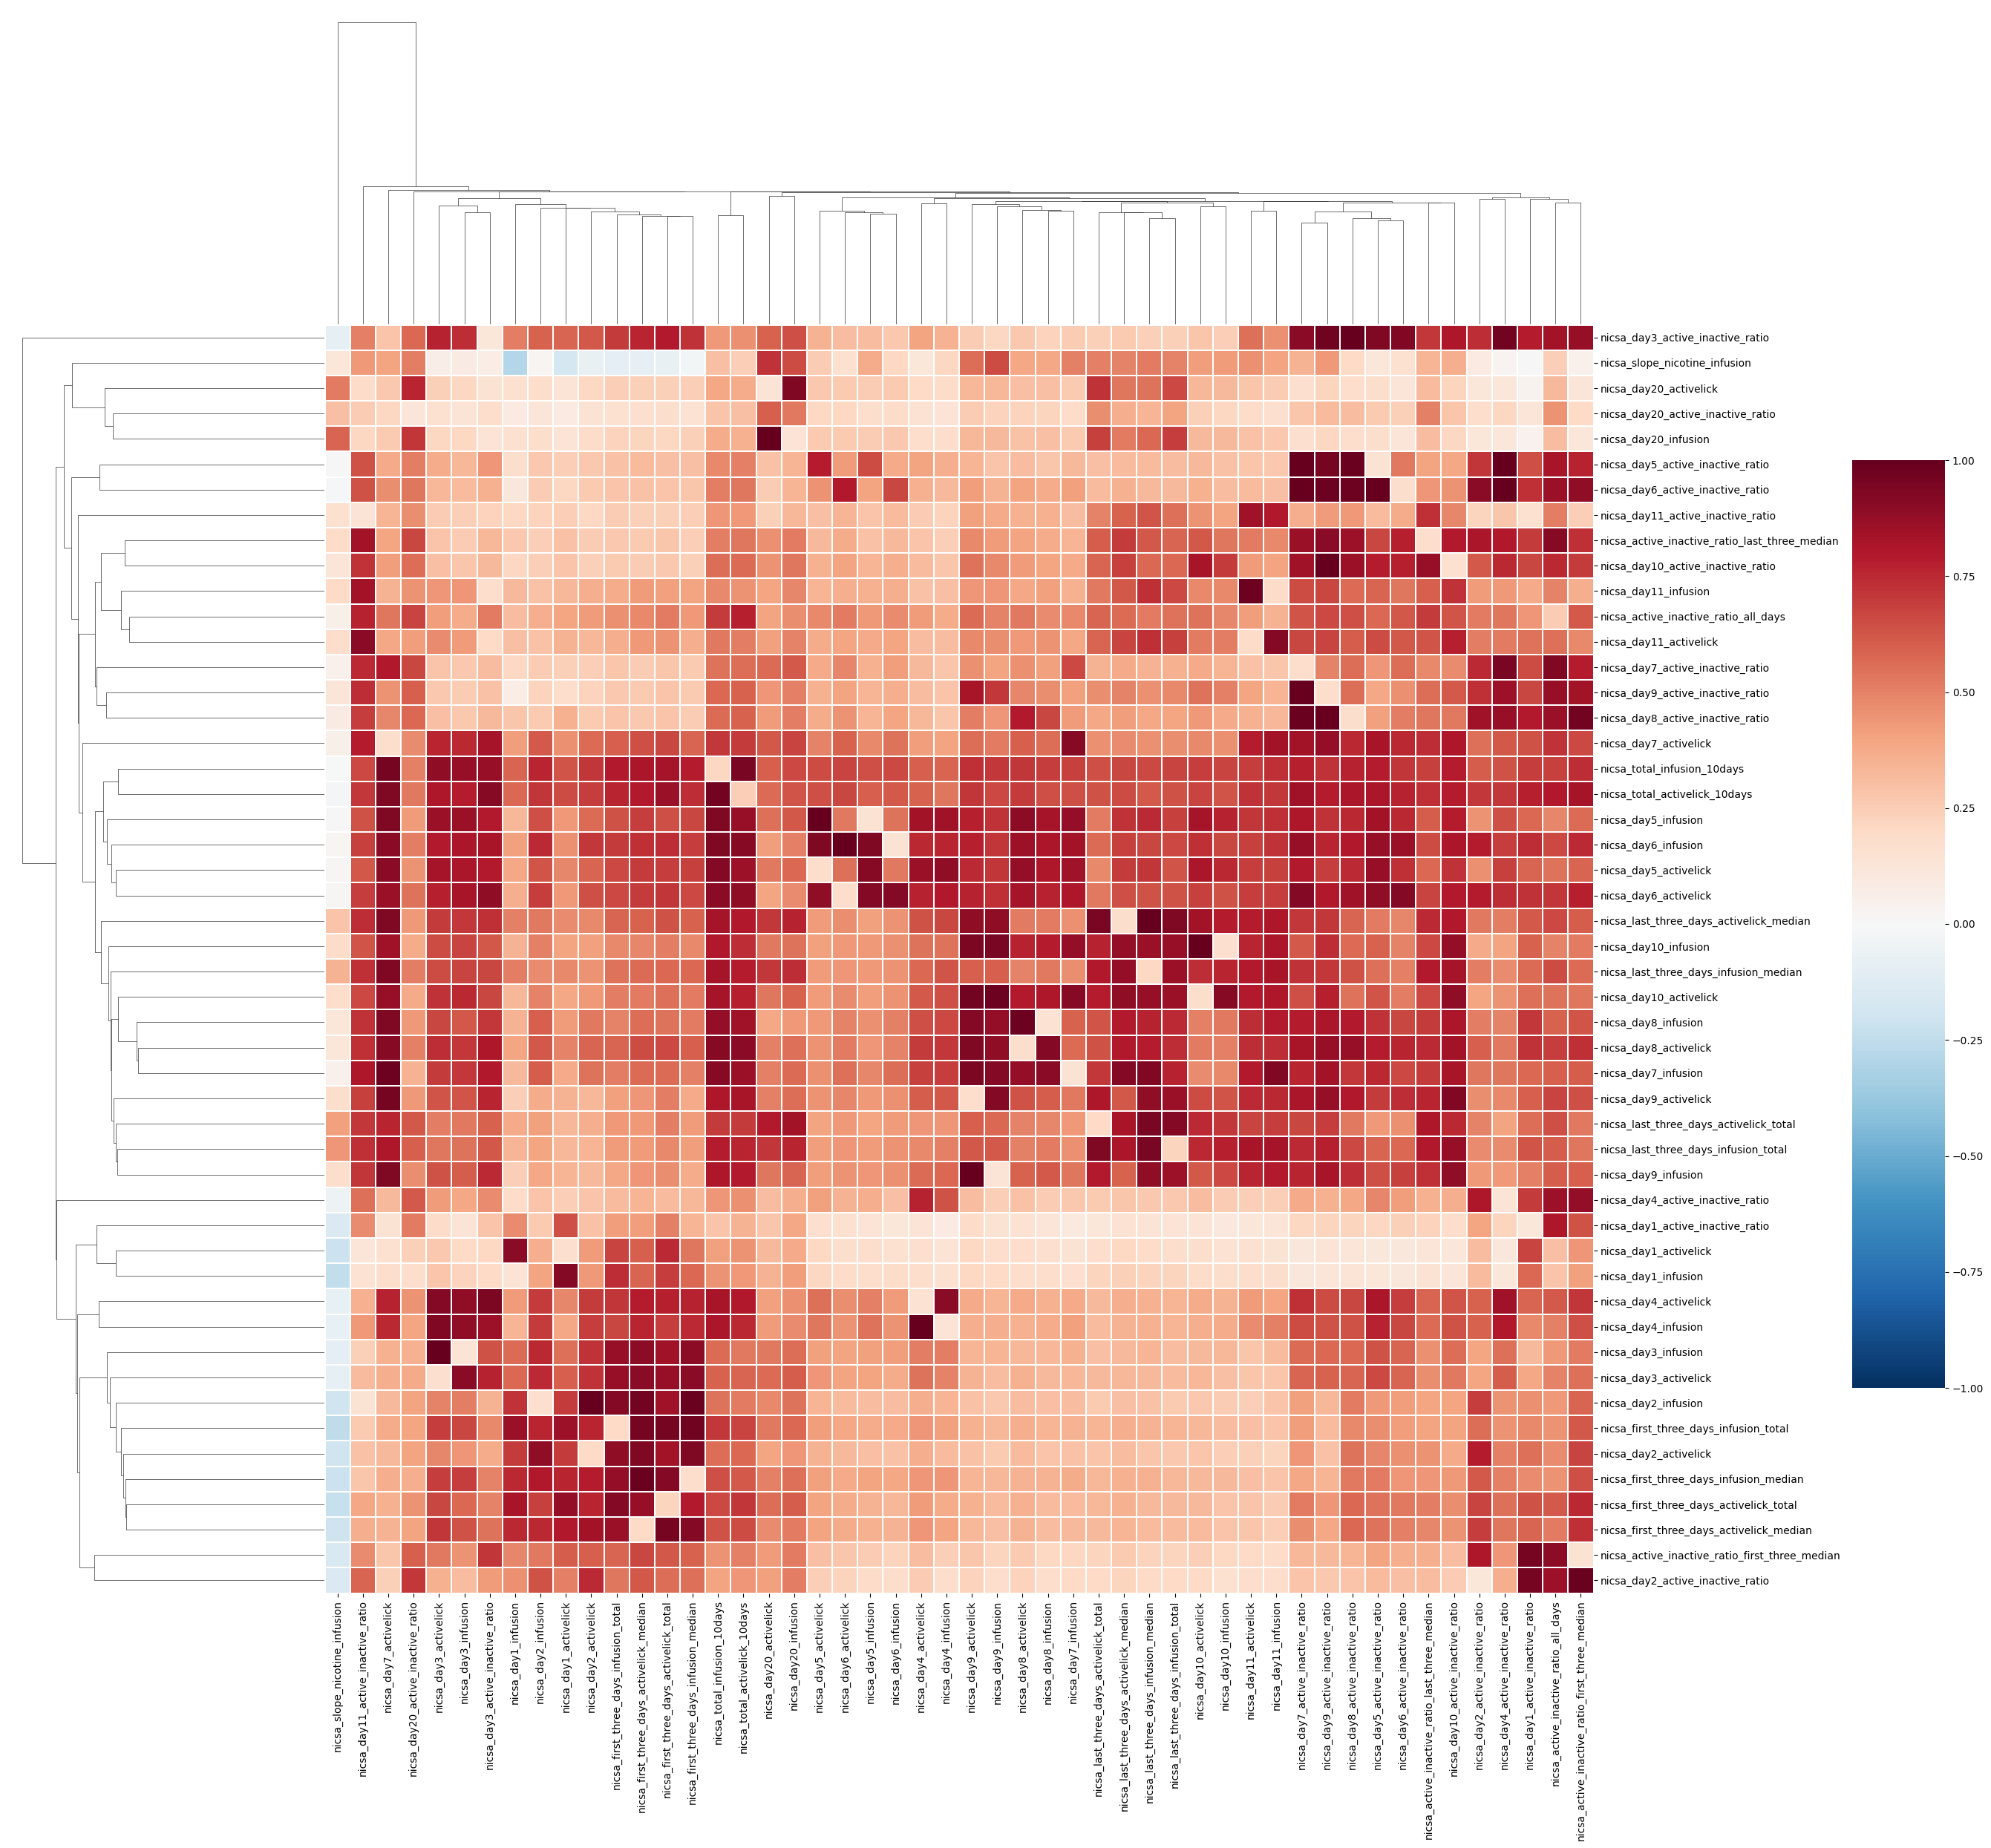

In [29]:
b = sns.clustermap(outgp_filt.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= True, row_cluster=True,method='single', metric='euclidean',
        annot=outgp_filt.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3, figsize=(25, 25) )
#dendrogram(hieg_f, ax = b.ax_col_dendrogram)
b.ax_cbar.set_position([1, .25, .05, 0.5])
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')

#the order for these are incorrect- I'm not sure how to fix it.

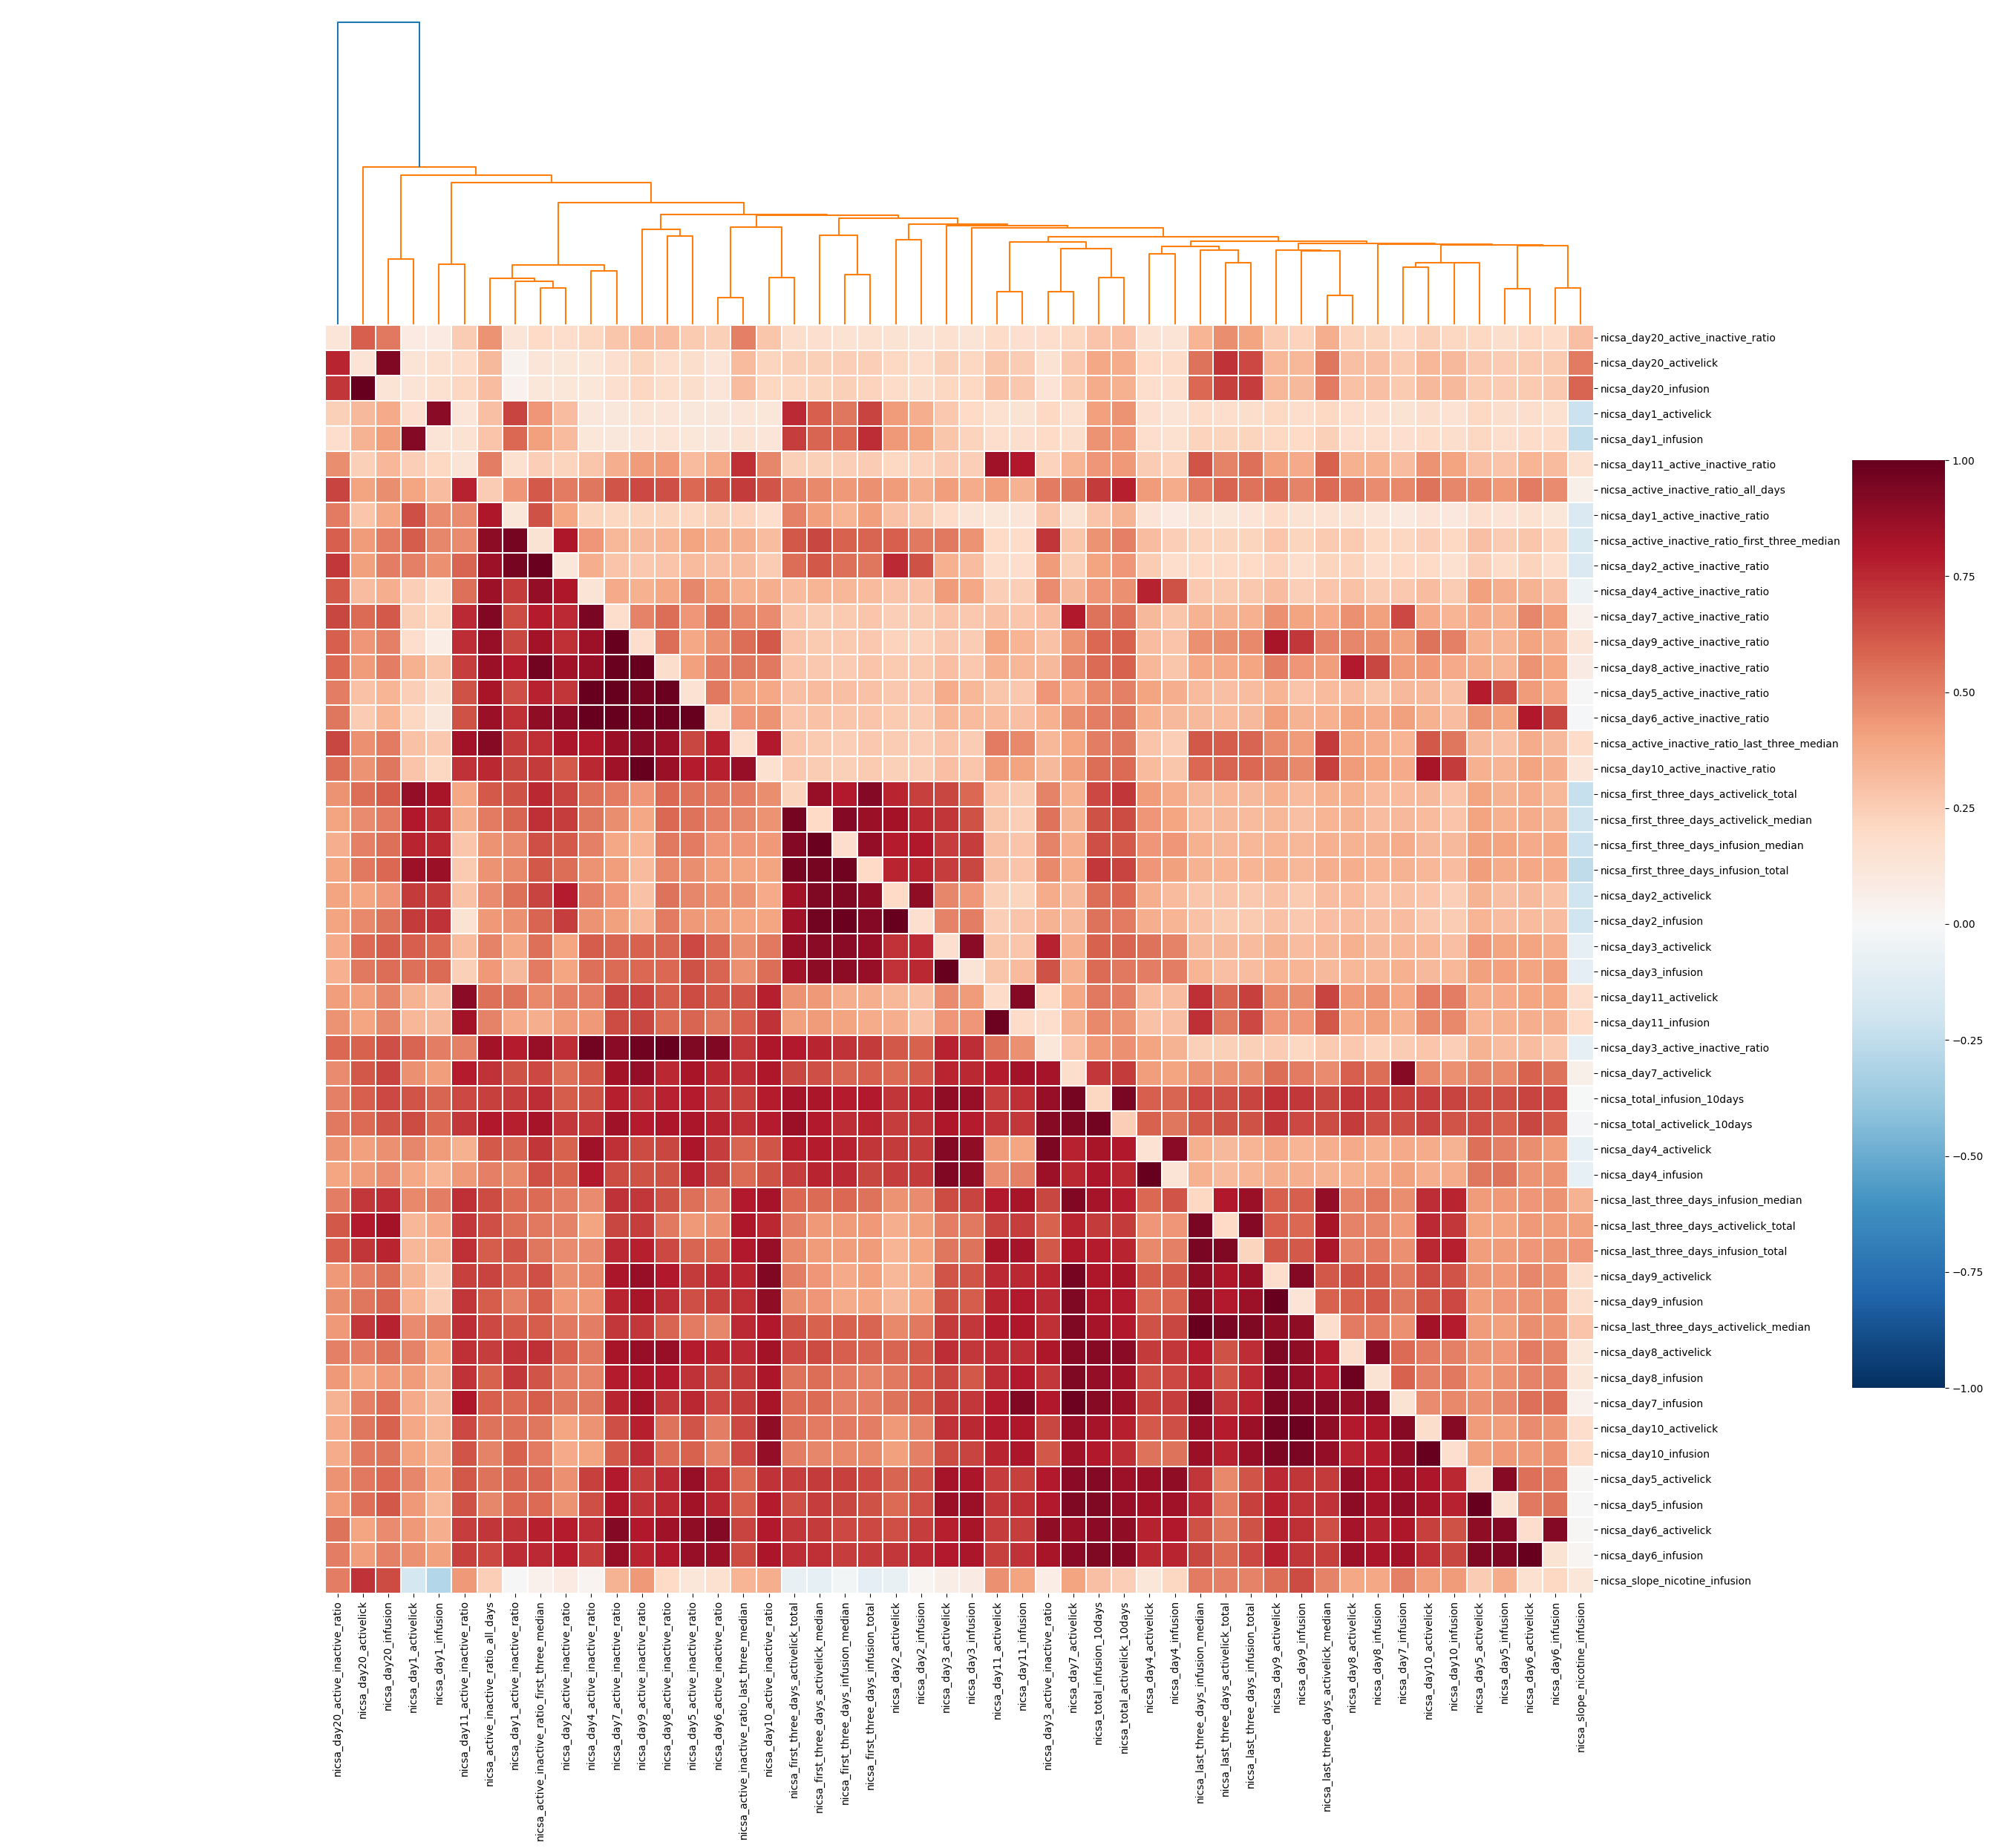

In [30]:
b = sns.clustermap(outgp_filt.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= False, row_cluster=False,method='single', metric='euclidean',
        annot=outgp_filt.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3, figsize=(25, 25) )
dendrogram(hieg_f, ax = b.ax_col_dendrogram)
b.ax_cbar.set_position([1, .25, .05, 0.5])
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')


## traits with QTLs

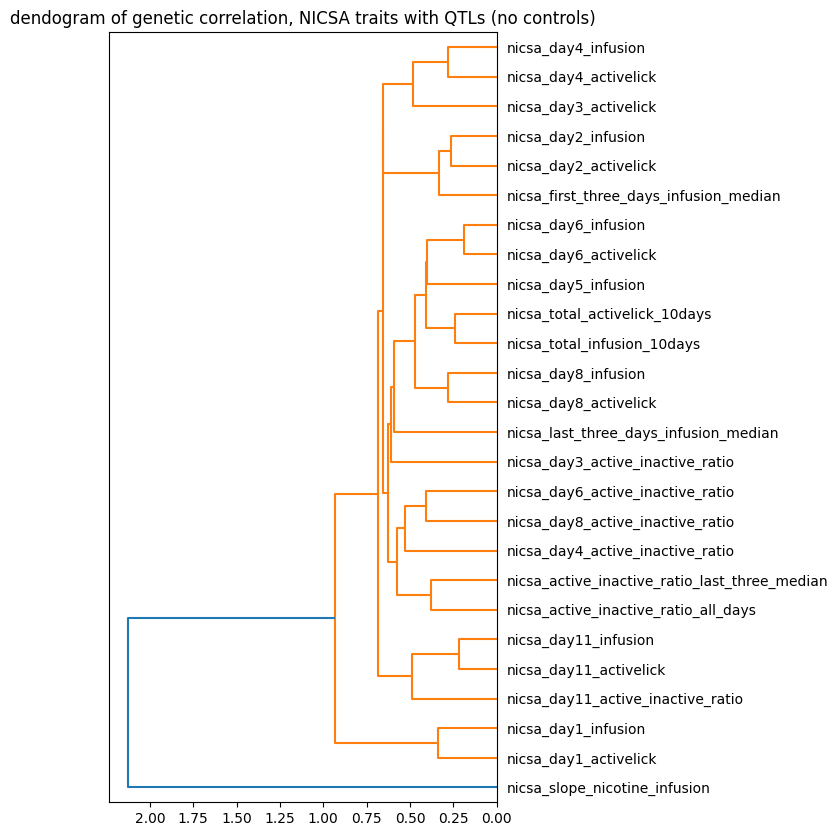

In [31]:
fig = plt.figure(figsize=(5, 10))
dn=plt.title('dendogram of genetic correlation, NICSA traits with QTLs (no controls)')
dn = dendrogram(hieg_qtl,labels=outg_filt_qtl.index, orientation='left')

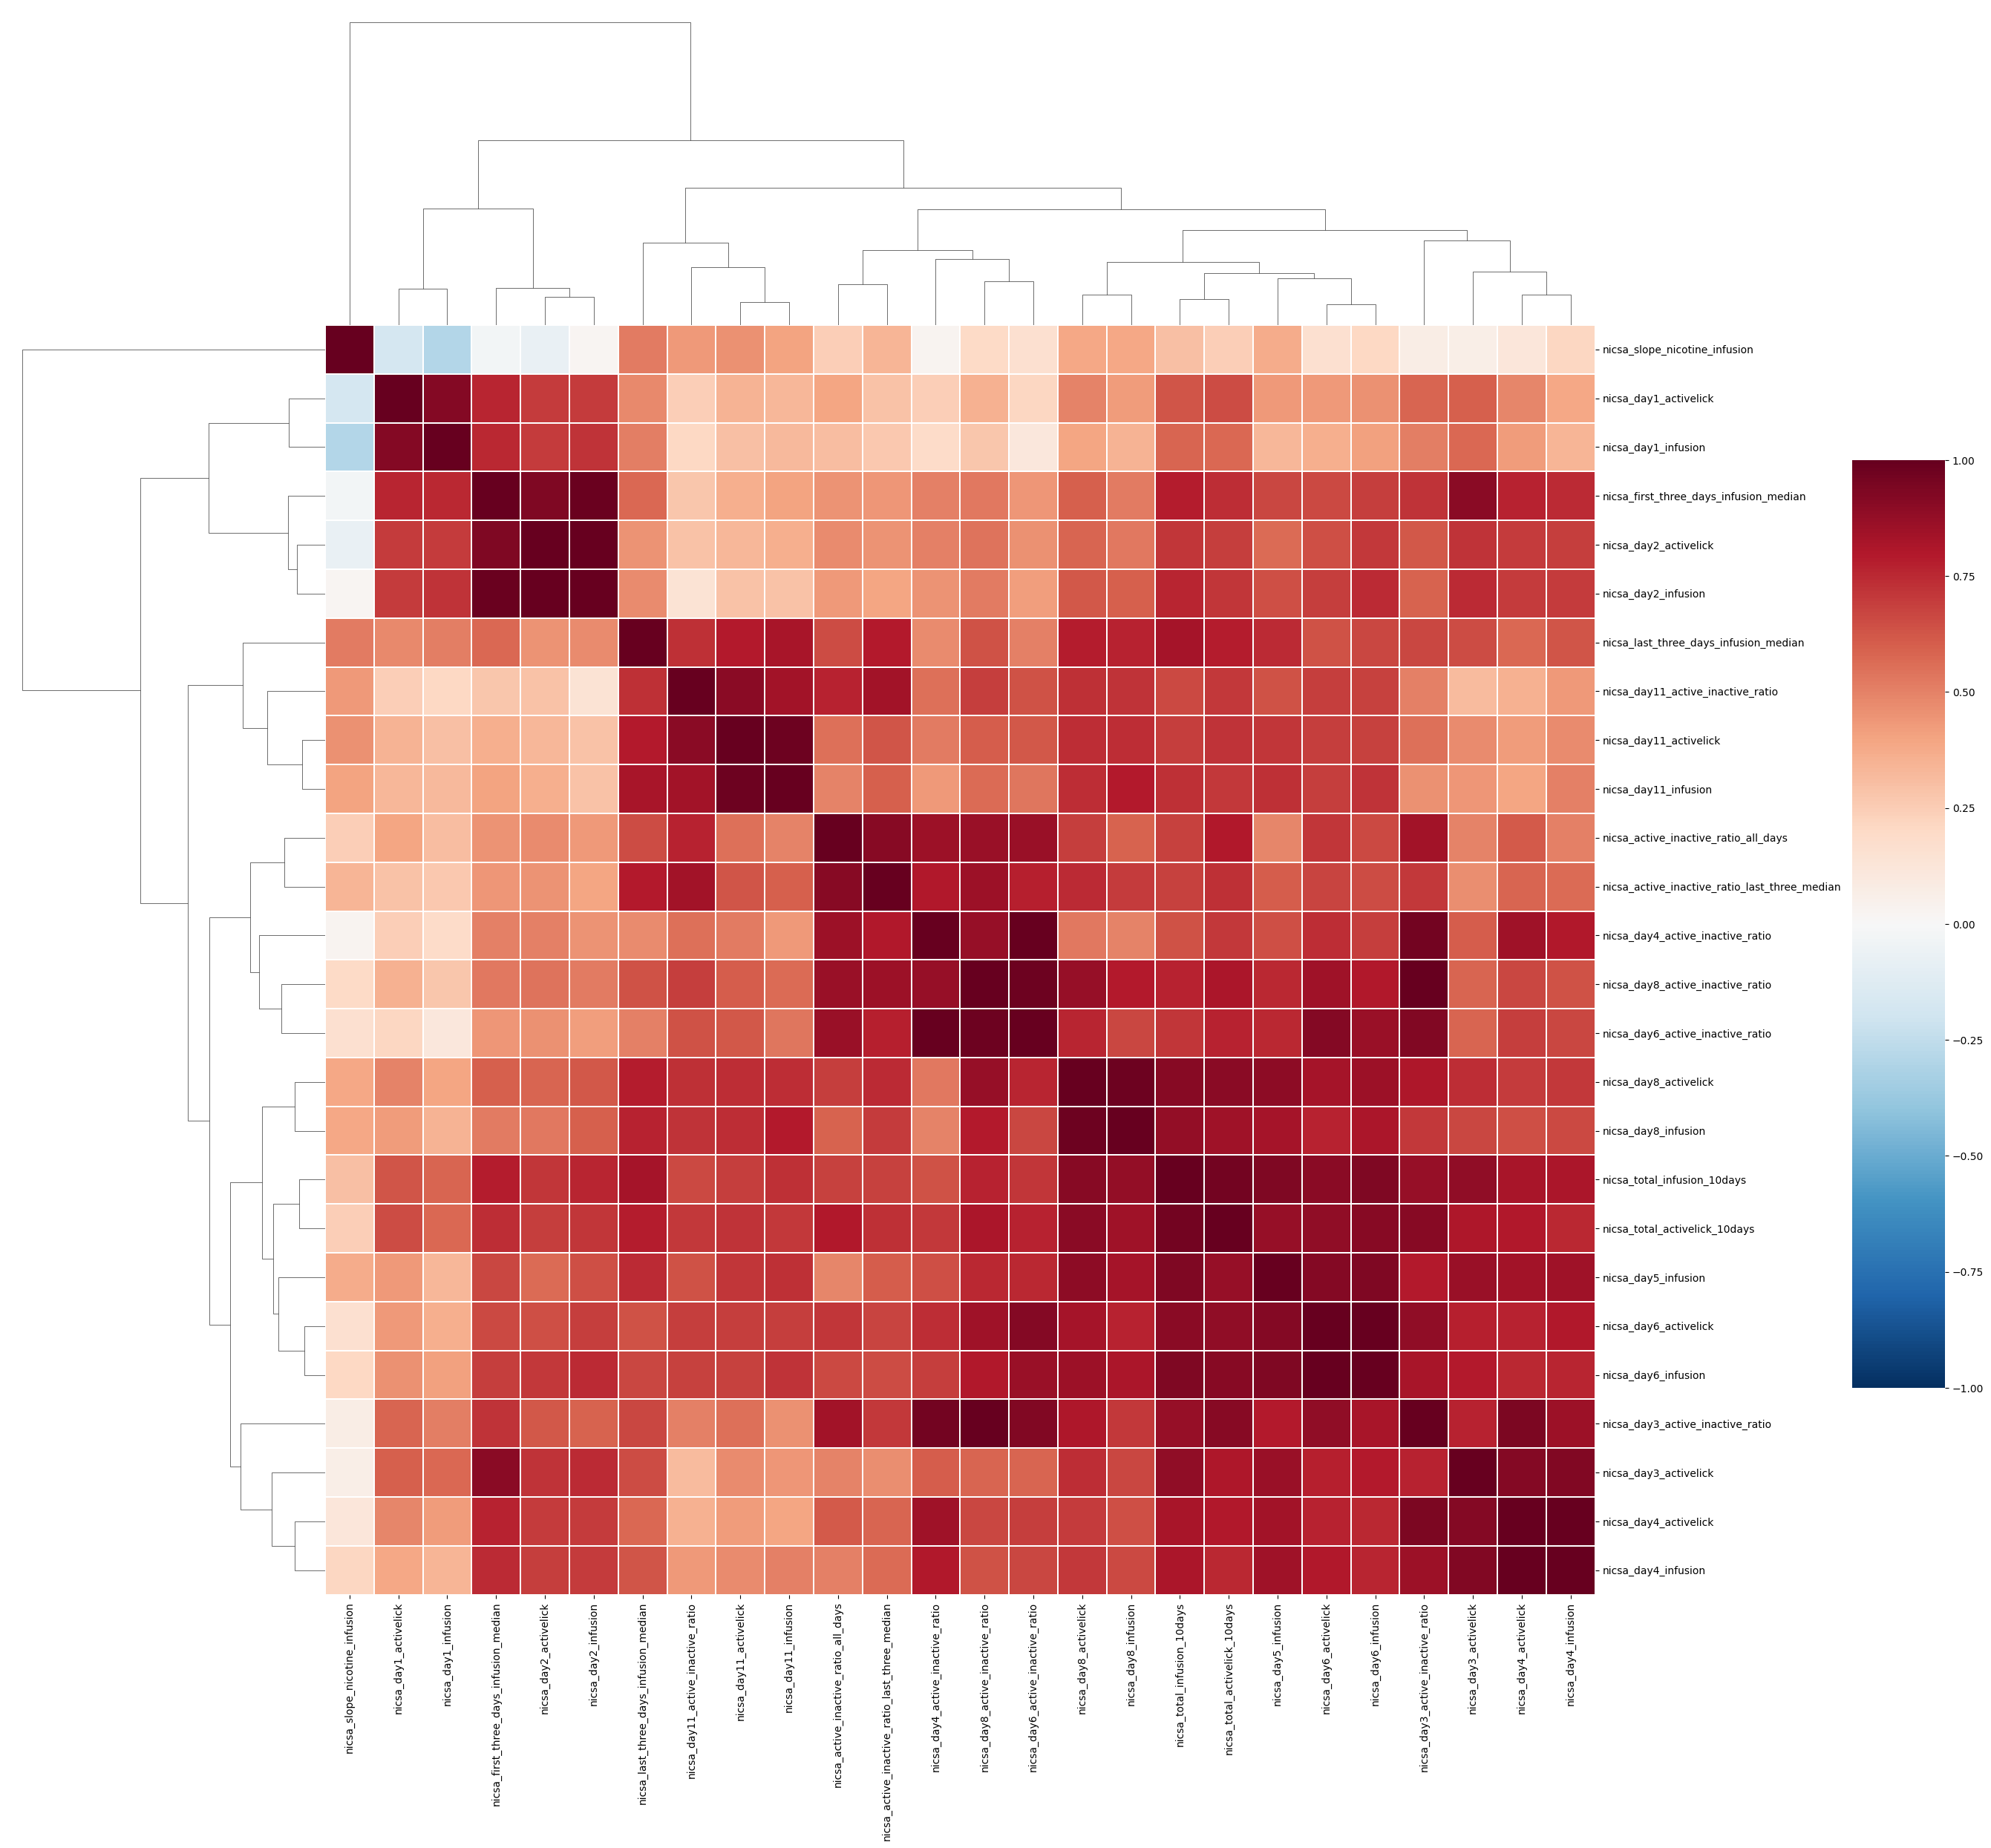

In [32]:
b = sns.clustermap(outg_filt_qtl.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= True, row_cluster=True,
        annot=outgp_filt_qtl.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3, figsize=(25, 25) )
#dendrogram(hieg_qtl, ax = b.ax_col_dendrogram)
b.ax_cbar.set_position([1, .25, .05, 0.5])
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')

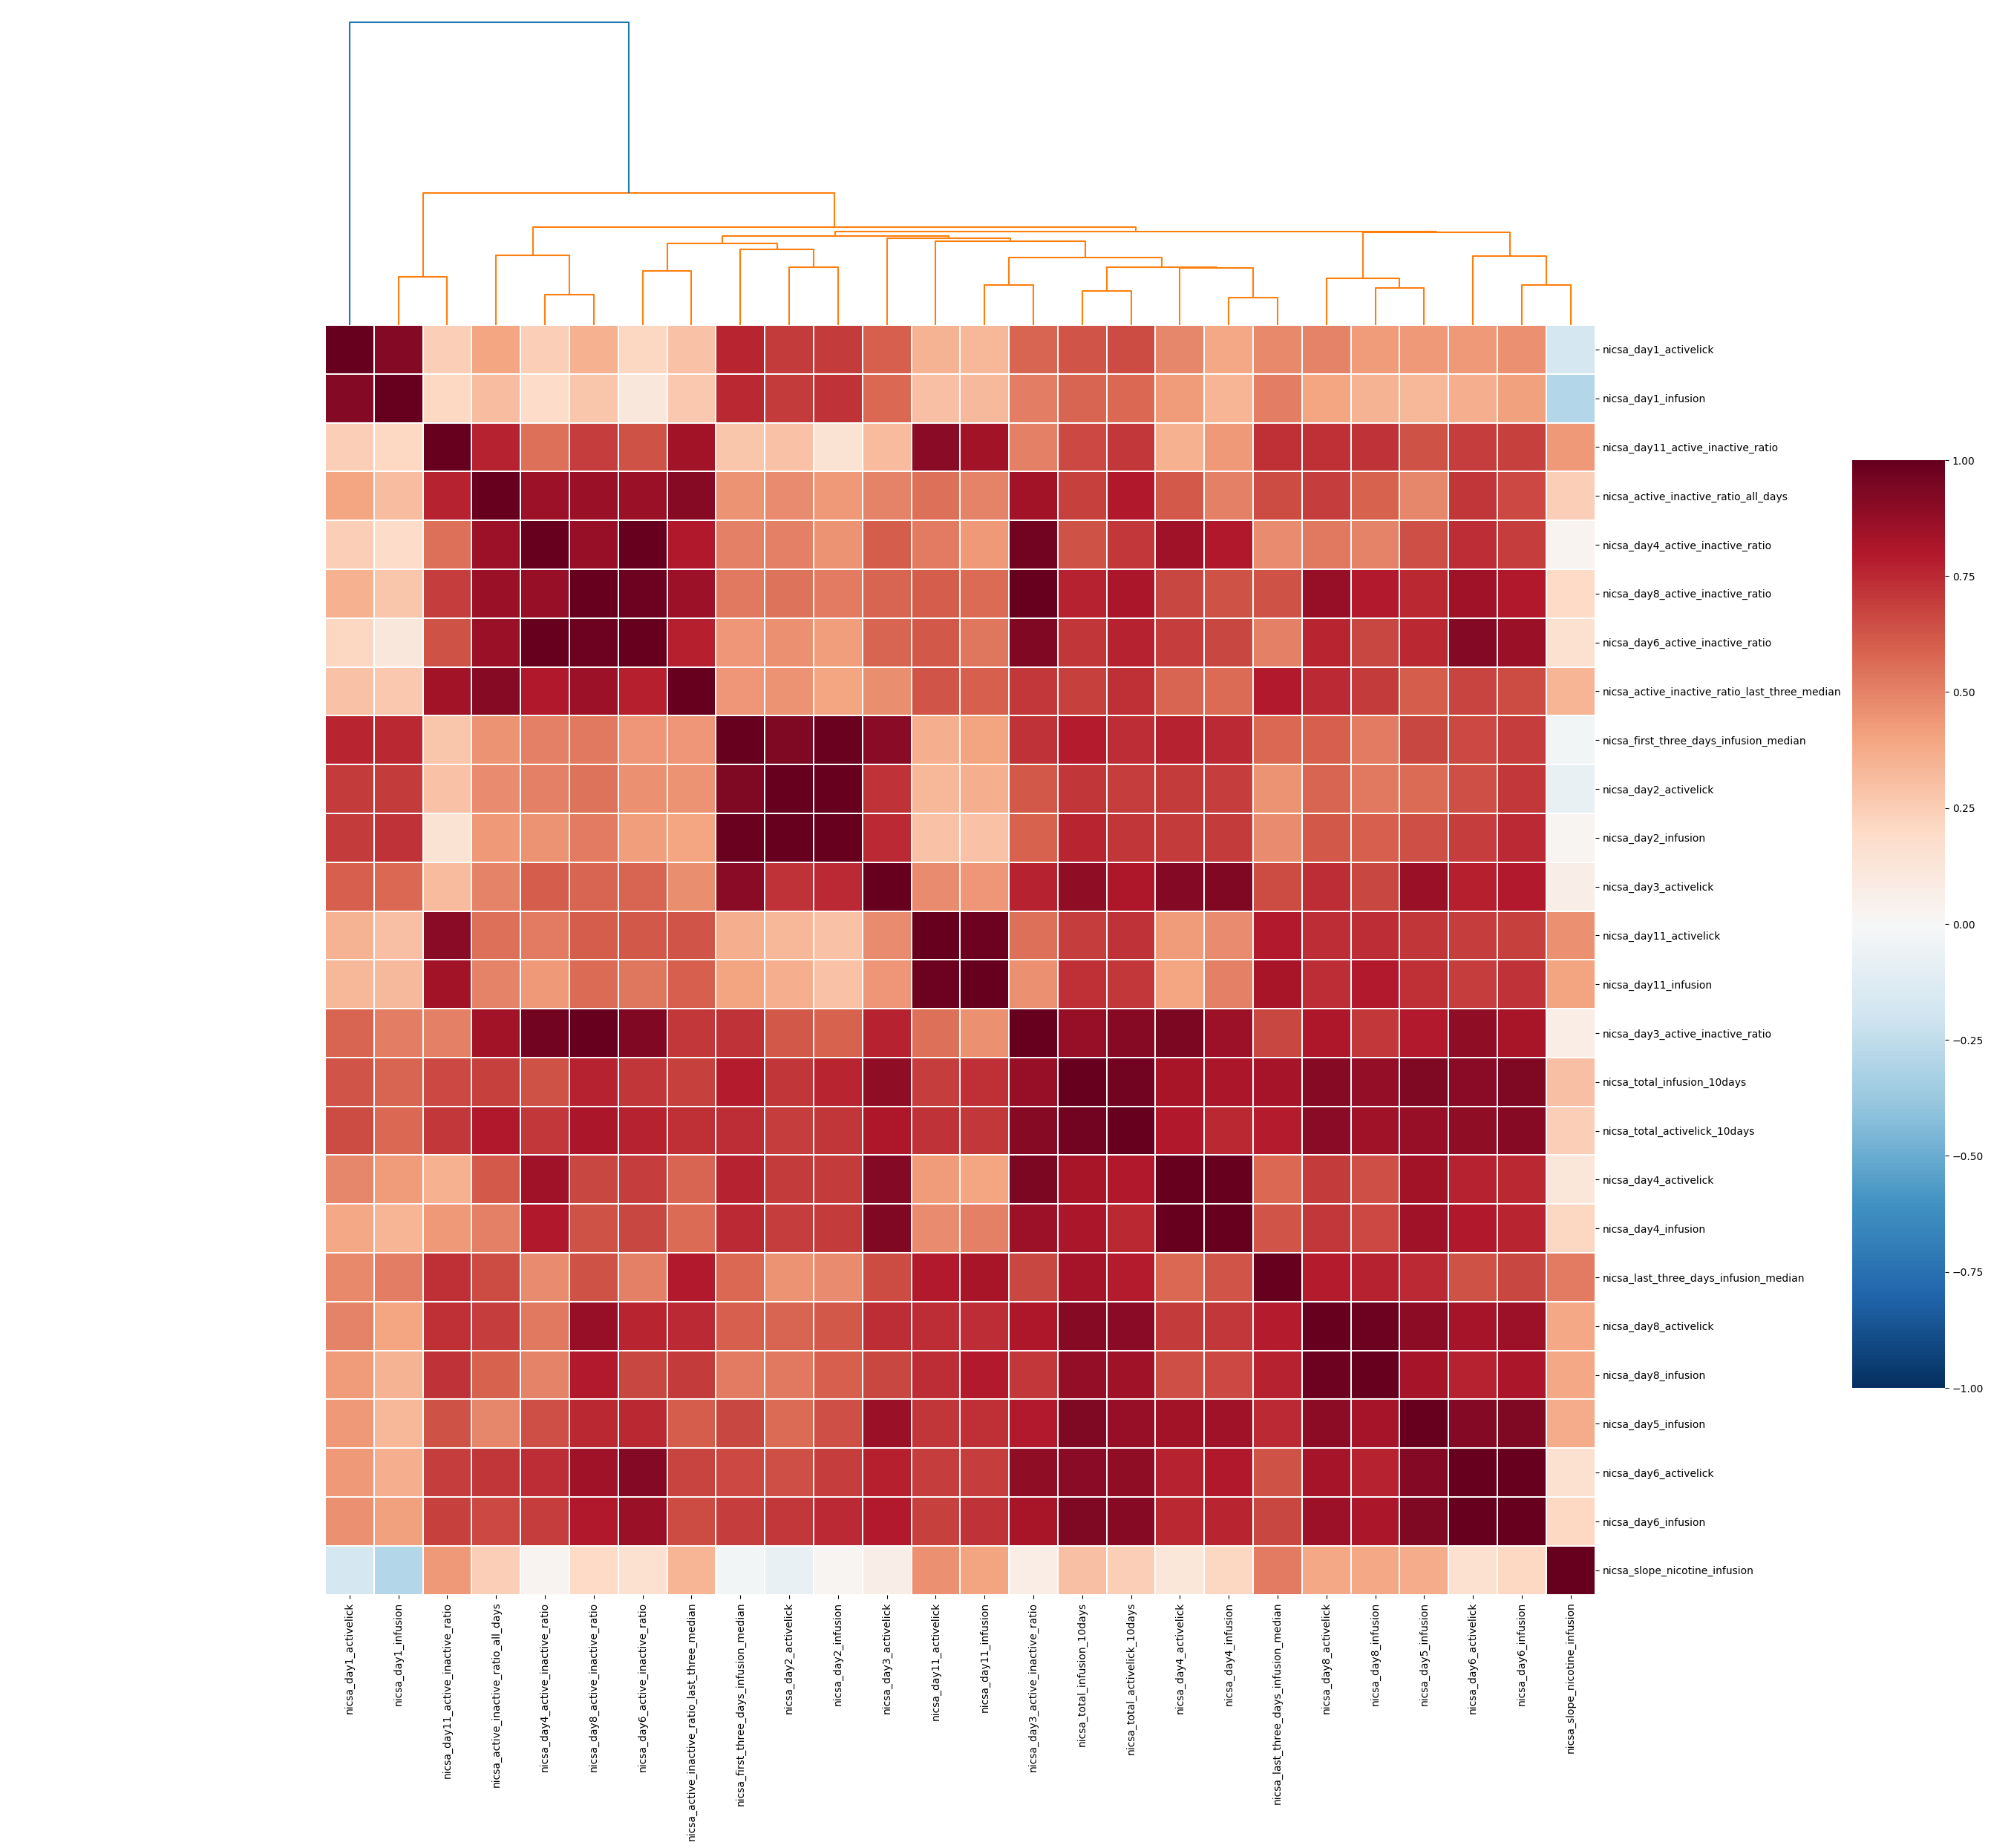

In [33]:
#THIS IS WRONG AND I CAN'T FIGURE OUT WHY
b = sns.clustermap(outg_filt_qtl.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= False, row_cluster=False,
        annot=outgp_filt_qtl.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3, figsize=(25, 25) )
dendrogram(hieg_qtl, ax = b.ax_col_dendrogram)
b.ax_cbar.set_position([1, .25, .05, 0.5])
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')

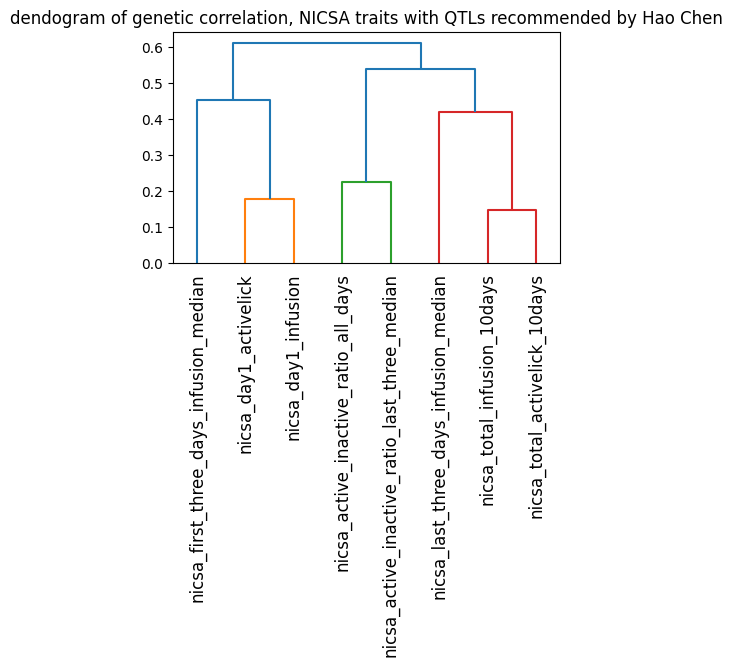

In [34]:
fig = plt.figure(figsize=(5, 3))
dn = dendrogram(hieg_hc,labels=outg_filt_hc.index, orientation='top',leaf_rotation='vertical')
dn=plt.title('dendogram of genetic correlation, NICSA traits with QTLs recommended by Hao Chen')

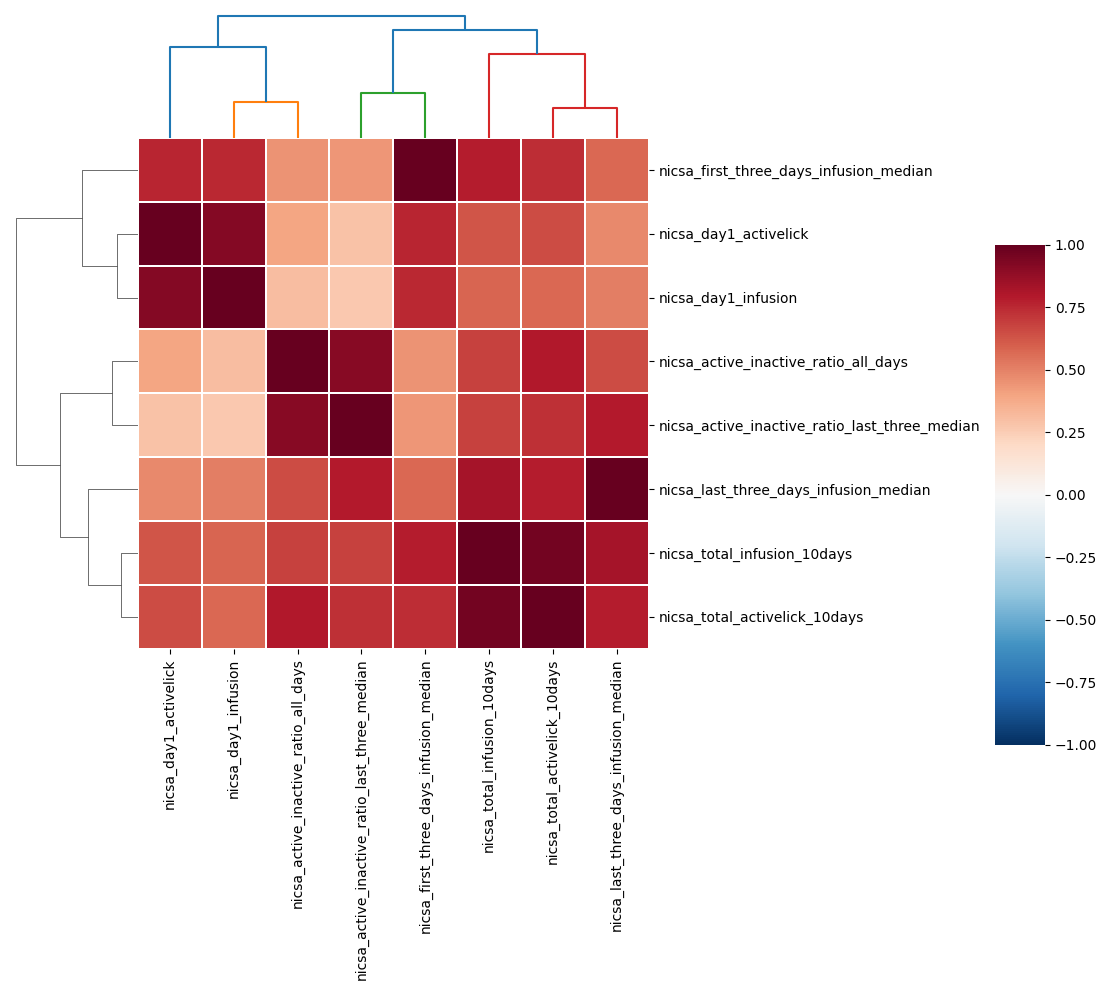

In [35]:
b = sns.clustermap(outg_filt_hc.applymap(lambda x: float(x.split('+-')[0])),  cmap="RdBu_r", col_cluster= False, row_cluster=True,
        annot=outgp_filt_hc.applymap(lambda x: '' if '*' not in x else '*'), vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = 0.3, figsize=(10, 10) )
dendrogram(hieg_hc, labels=outg_filt_hc.index,ax = b.ax_col_dendrogram)
b.ax_cbar.set_position([1, .25, .05, 0.5])
#sns.move_legend(b, "center right")
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.png', dpi = 400)
#plt.savefig(f'{self.path}images/genetic_correlation_matrix.eps')

In [200]:
#define groups of traits to try PCA analysis on
dendo_dict={
    'level1a_ciday':['total_activelick_10days','total_infusion_10days'],
'level2a_ciday':level1a_ciday+['last_three_days_infusion_median'],
'level1a_ciday':['active_inactive_ratio_last_three_median','active_inactive_ratio_all_days'],
'level1a_smkinit':['day1_infusion','day1_activelick']}

# PCA analysis -smkinit qtl only

## SMKINIT all QTL traits

In [228]:
df=tbl_smkinit.dropna(axis='rows')

In [229]:
len(df)

2010

In [230]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [231]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_smkinit = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (78.6% expl.var)', ylabel='PC2 (18.2% expl.var)'>)

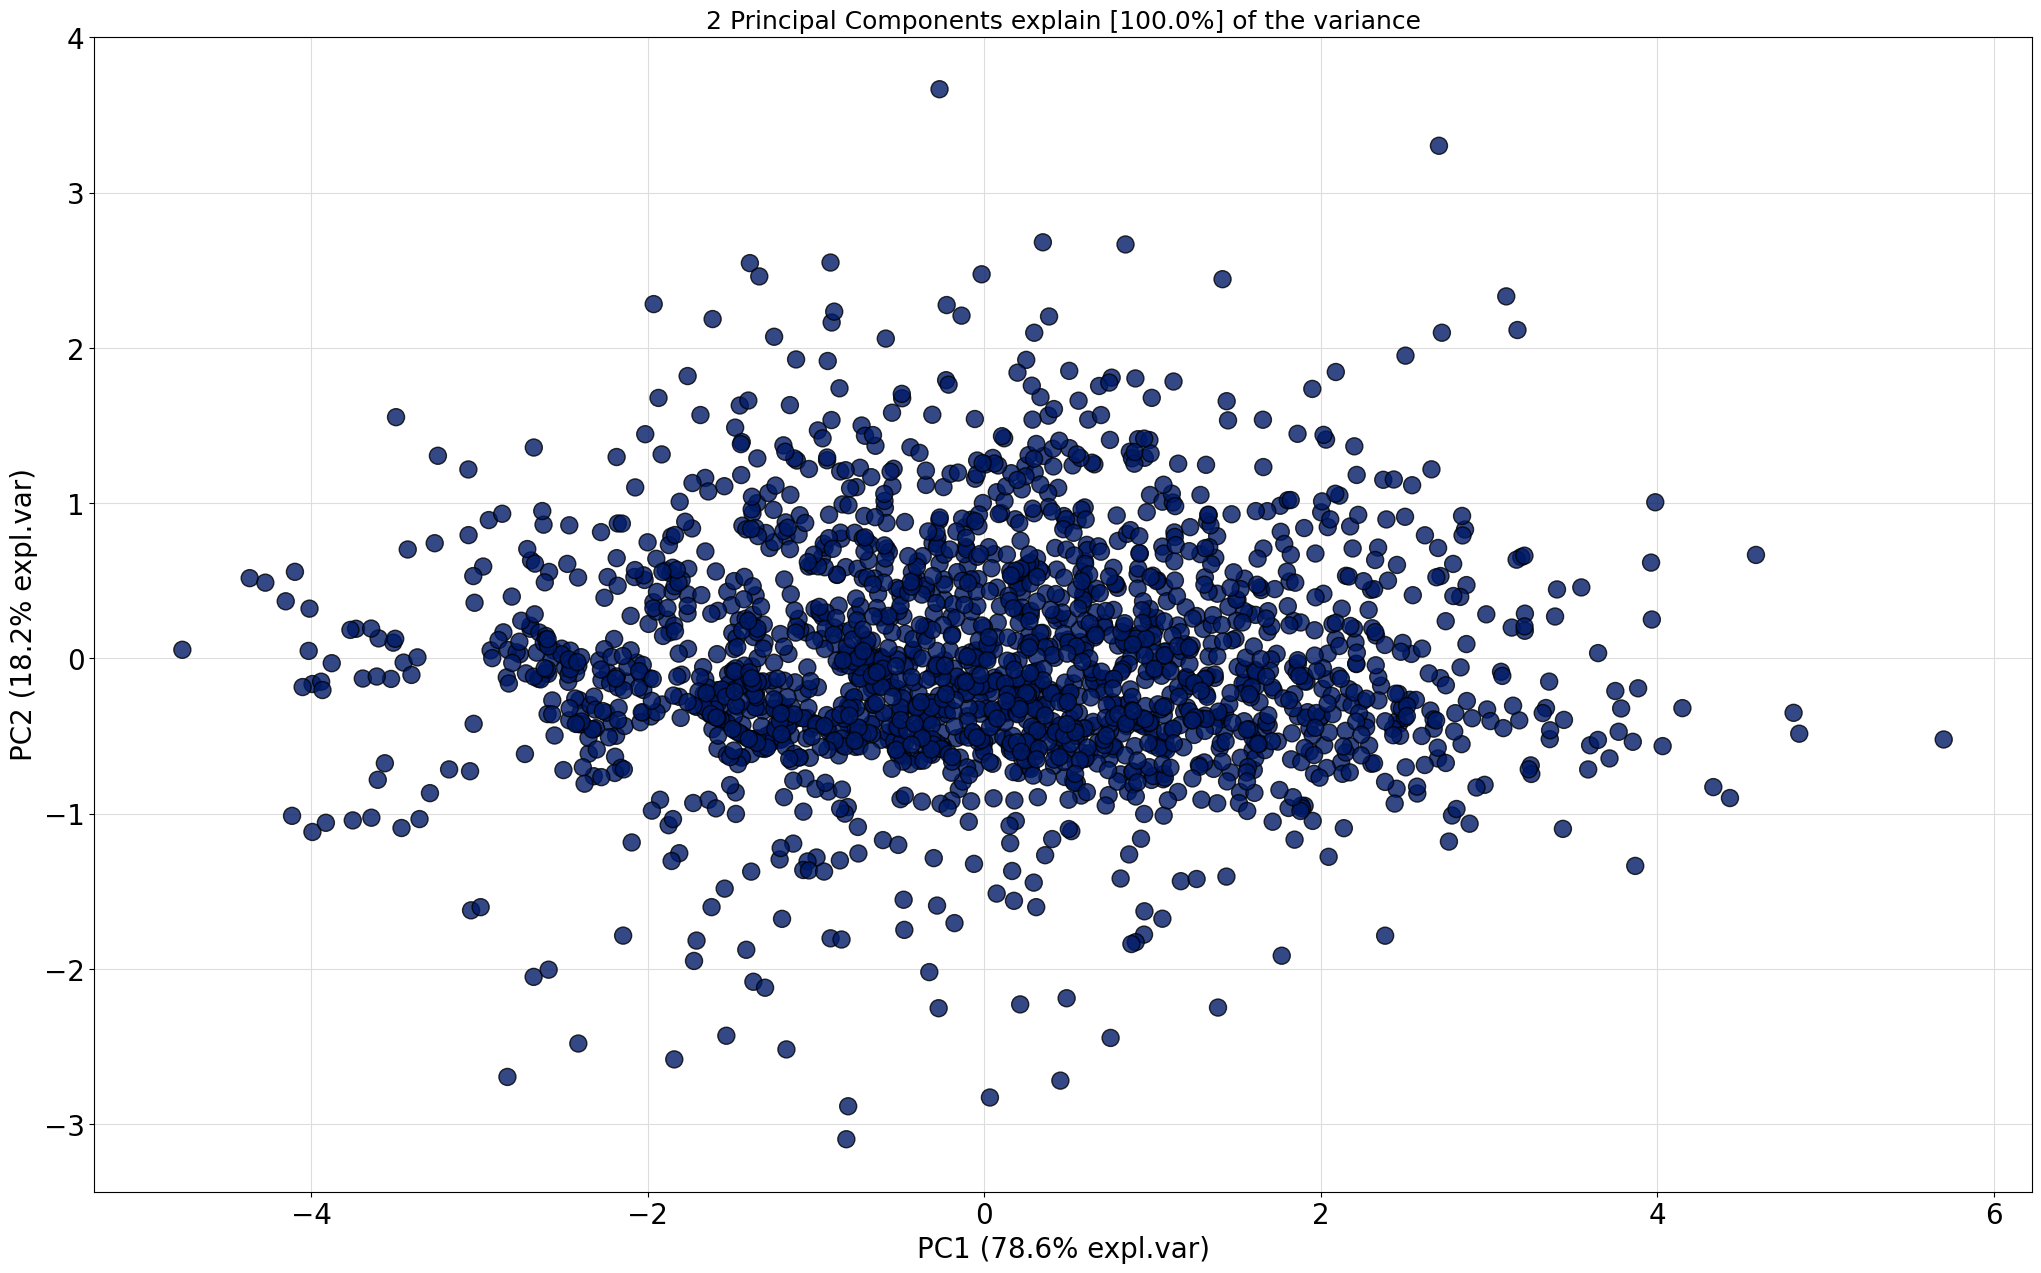

In [232]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 2 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

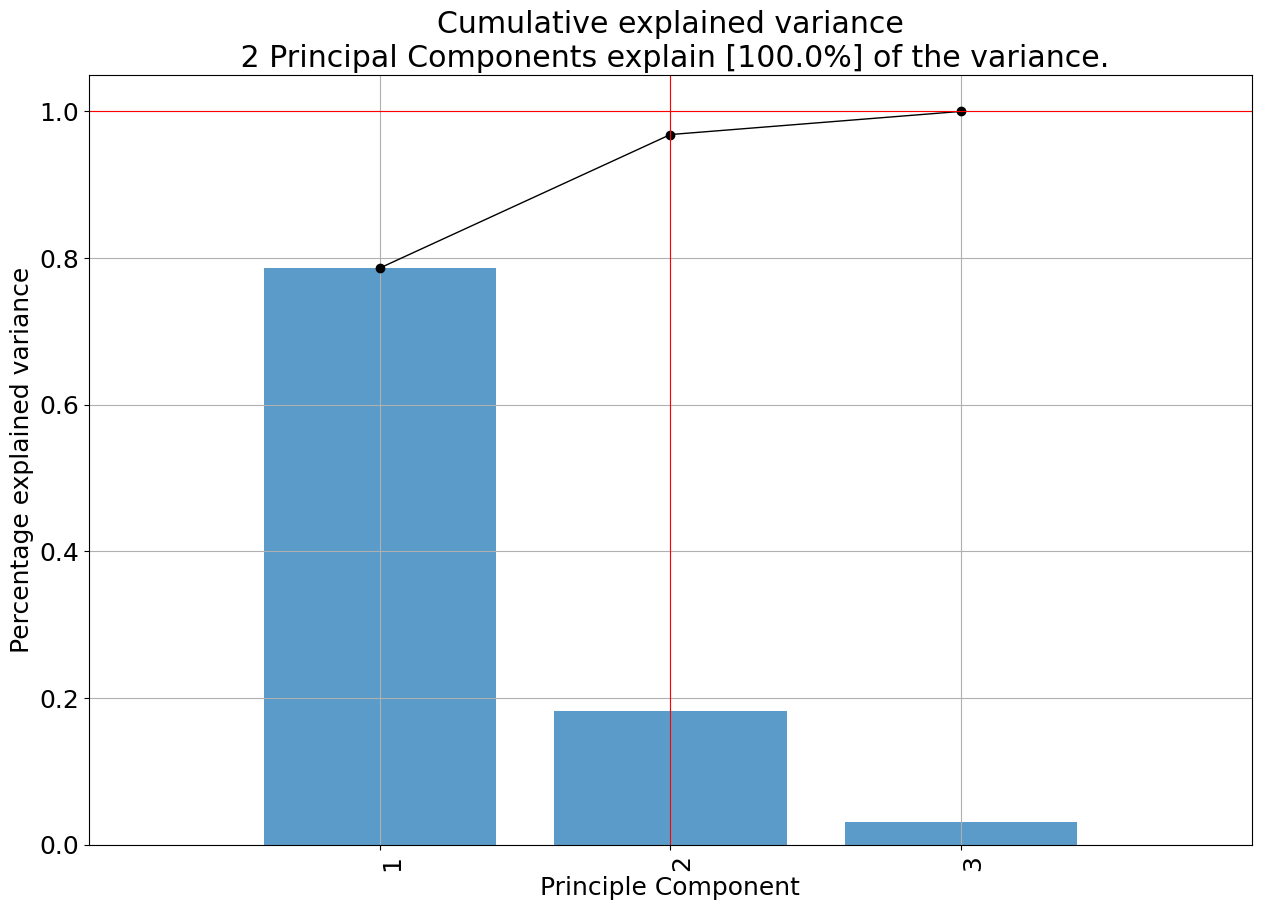

In [234]:
model.plot()

(array([ 18.,  55., 202., 446., 532., 424., 237.,  76.,  17.,   3.]),
 array([-4.76474549, -3.71790445, -2.6710634 , -1.62422236, -0.57738131,
         0.46945973,  1.51630078,  2.56314182,  3.60998287,  4.65682391,
         5.70366496]),
 <BarContainer object of 10 artists>)

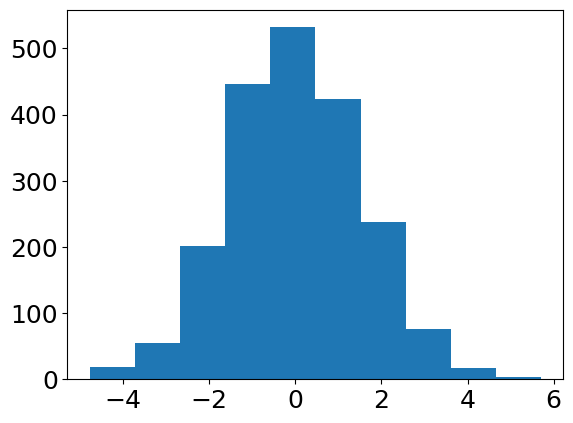

In [235]:
plt.hist(results_smkinit['PC']['PC1'])

In [236]:
output=tbl_smkinit.dropna(axis='rows')

In [237]:
output

RFID  first_three_days_infusion_median  day1_activelick  \
0     00078A008E                         -0.639008        -1.545330   
1     0007D2DDED                         -0.185069        -1.168650   
2     000792A302                         -1.162482         0.776632   
3     00078A256A                          0.012434        -0.491235   
4     0007D2E752                         -0.793341        -1.898319   
...          ...                               ...              ...   
2013  0007D3528C                          0.690183        -1.273662   
2014  00078A19AD                         -0.125912        -0.467476   
2015  DD1DCD20E6                         -0.422556         0.788477   
2016  DD1DCD218B                          1.177271         1.196221   
2017  00077E7B73                         -0.193931        -1.038140   

      day1_infusion  
0         -1.759057  
1         -0.766195  
2          0.794931  
3         -0.571181  
4         -1.237739  
...             ...  
2013      -0.847319  
2014      -0.135656  
2015       0.422990  
2016       0.590362  
2017      -0.769542  

[2010 rows x 4 columns]

In [238]:
output.insert(2, "pc1_smkinit_QTL", list(results_smkinit['PC']['PC1']), True)

## SMKINIT 1a

In [239]:
df=tbl_smkinit[['RFID']+dendo_dict['level1a_smkinit']].dropna()
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [240]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_smkinit = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [2] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '1 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (95.1% expl.var)', ylabel='PC2 (0% expl.var)'>)

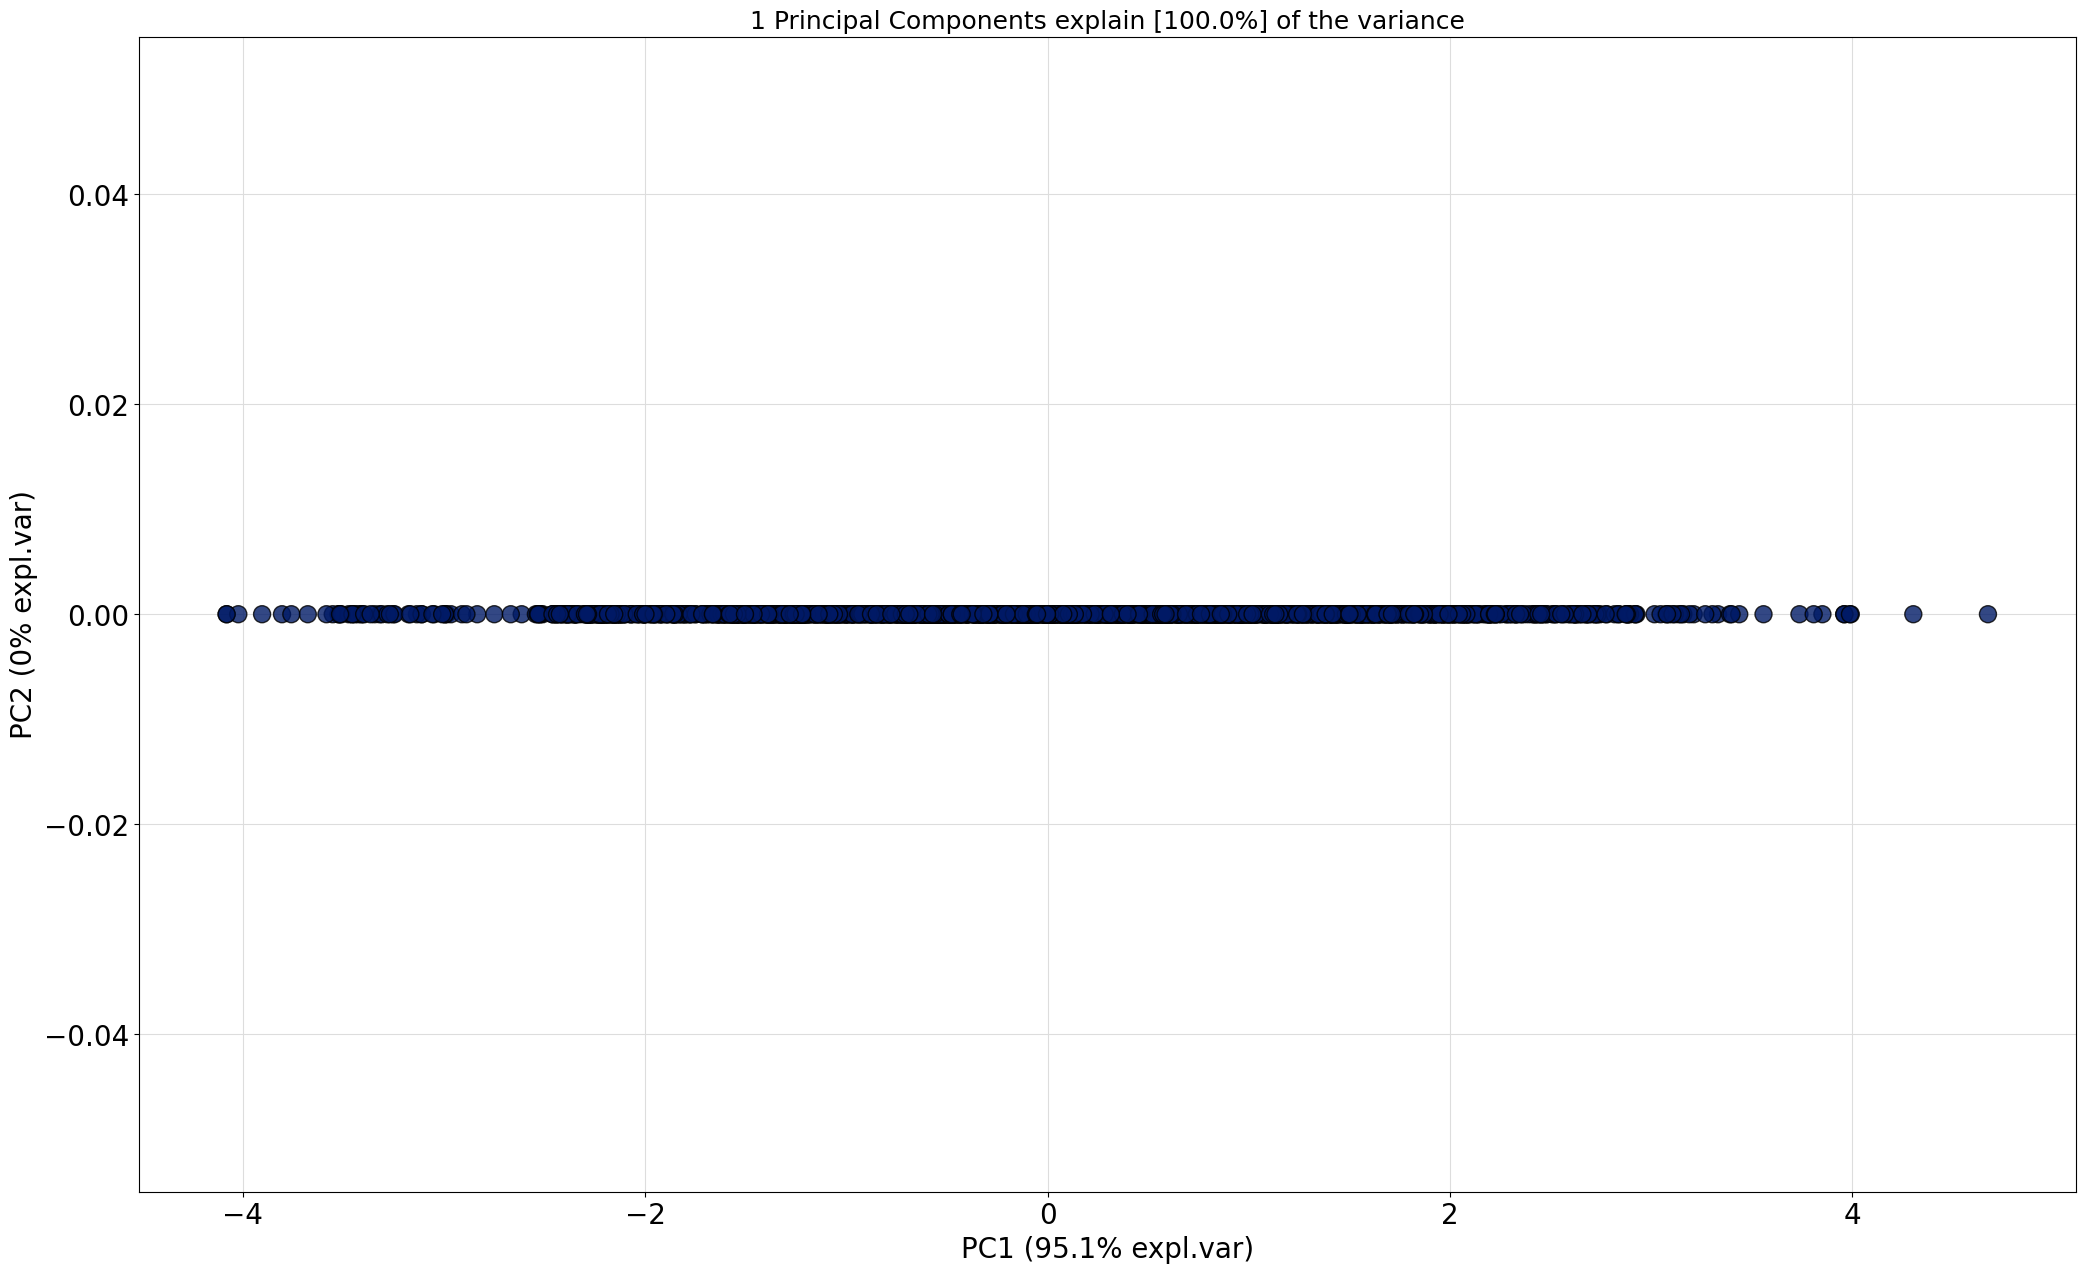

In [241]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 1 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

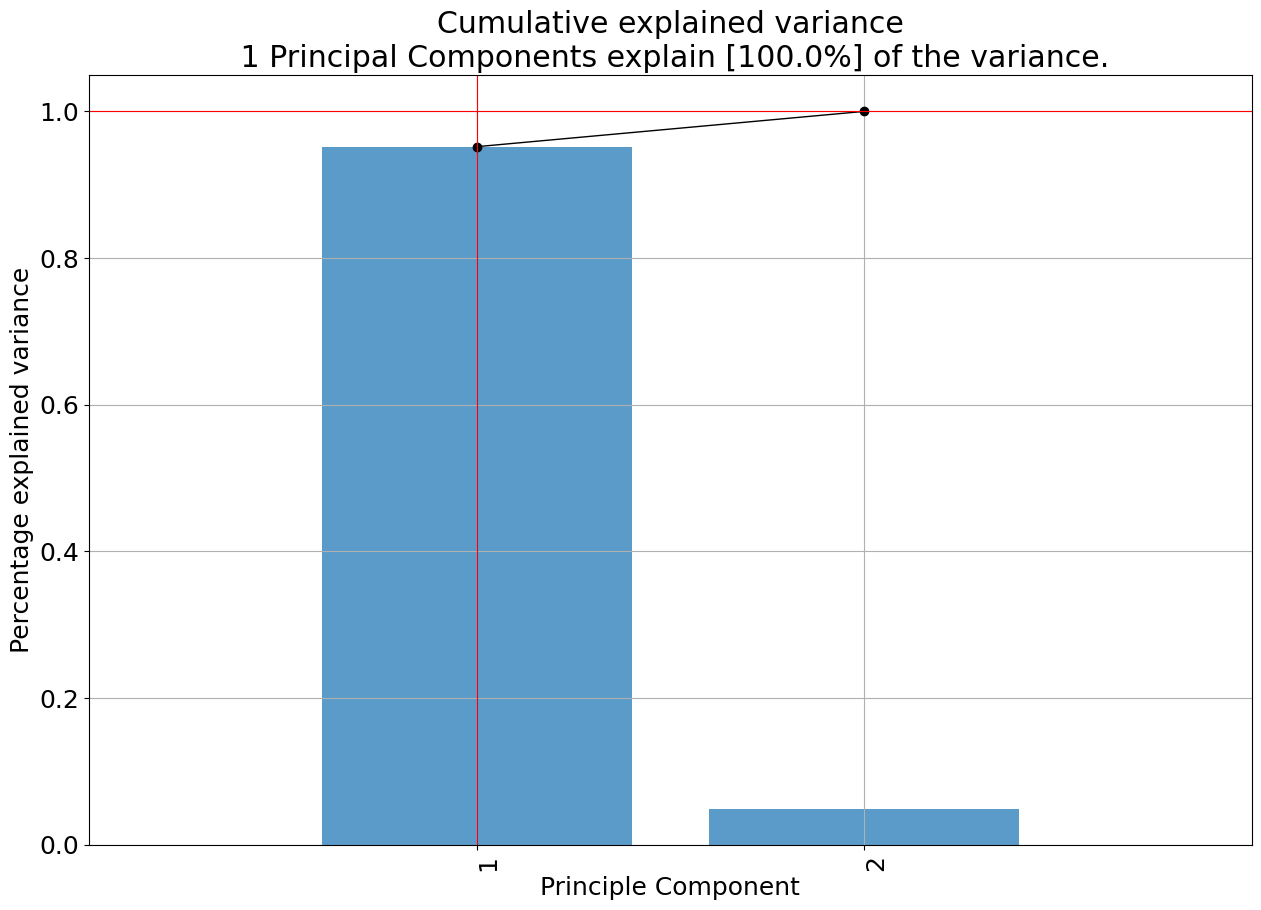

In [242]:
model.plot()

In [243]:
output.insert(2, "pc1_smkinit1a_QTL", list(results_smkinit['PC']['PC1']), True)

# PCA-all qtl traits

In [250]:
tbl_qtl

RFID  day11_active_inactive_ratio  slope_nicotine_infusion  \
0     00078A008E                     0.869424                 0.000000   
1     0007D2DDED                    -0.195495                 0.418042   
2     000792A302                    -0.652077                -0.968083   
3     00078A256A                     0.241181                -0.133302   
4     0007D2E752                    -1.057090                -1.766546   
...          ...                          ...                      ...   
2013  0007D3528C                     0.761074                 0.060902   
2014  00078A19AD                    -0.834262                 0.288397   
2015  DD1DCD20E6                    -1.272446                 1.514767   
2016  DD1DCD218B                    -0.057589                 0.174785   
2017  00077E7B73                    -0.916591                 0.581429   

      day3_active_inactive_ratio  day4_activelick  day6_active_inactive_ratio  \
0                       0.607795         1.915384                    1.941096   
1                      -0.638827         0.005054                    0.002619   
2                      -0.815331        -2.875627                   -0.732358   
3                       1.696959              NaN                    1.633312   
4                      -1.028379        -0.280318                   -0.869571   
...                          ...              ...                         ...   
2013                    0.361621        -0.630717                    0.631535   
2014                    1.063706         0.562774                    1.041151   
2015                    0.008943        -0.476003                   -0.030126   
2016                    0.095966         0.698477                   -0.614046   
2017                   -1.625878        -1.554943                   -1.430547   

      day2_infusion  day6_infusion  day3_activelick  \
0         -0.719994            NaN        -0.278078   
1         -0.854898       0.979735         0.612282   
2         -0.762847      -0.453267        -0.683588   
3          0.259558       0.460357         2.022664   
4          0.683160      -0.229407        -0.066012   
...             ...            ...              ...   
2013       1.734006       0.076731         0.317483   
2014      -0.766201       0.397320         0.794219   
2015      -1.254143       0.031945        -0.258540   
2016       1.268008      -0.361621         0.385659   
2017      -0.081474      -0.507761        -1.588025   

      day4_active_inactive_ratio  day11_activelick  day11_infusion  \
0                       1.437363          3.281074        2.641420   
1                      -0.943771          0.817486        1.121381   
2                      -2.643857         -0.735140       -0.683448   
3                       1.958214         -0.290468       -0.216383   
4                      -0.993027         -1.458228       -0.969489   
...                          ...               ...             ...   
2013                   -0.306504          0.551664        0.826239   
2014                    0.855240         -0.207558        0.081575   
2015                    0.555002         -0.997523       -1.216112   
2016                    0.290392          0.496642        0.724882   
2017                   -1.595253         -0.792399       -0.824420   

      day8_active_inactive_ratio  day4_infusion  day8_activelick  \
0                            NaN       1.640956              NaN   
1                      -0.916541       0.198387         0.223319   
2                      -0.874746      -2.405983        -0.053619   
3                       2.461845       1.869942         0.565299   
4                      -0.172085      -0.269820        -0.181137   
...                          ...            ...              ...   
2013                   -1.687846      -0.749379        -1.368851   
2014                   -0.511144       0.660282         0.582046   
2015                    0.178852    

In [245]:
len(tbl_qtl)

2018

In [251]:
df=tbl_qtl.dropna(axis='rows')

In [252]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [253]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [18] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [97.11%] of the variance'}, xlabel='PC1 (40.3% expl.var)', ylabel='PC2 (13.3% expl.var)'>)

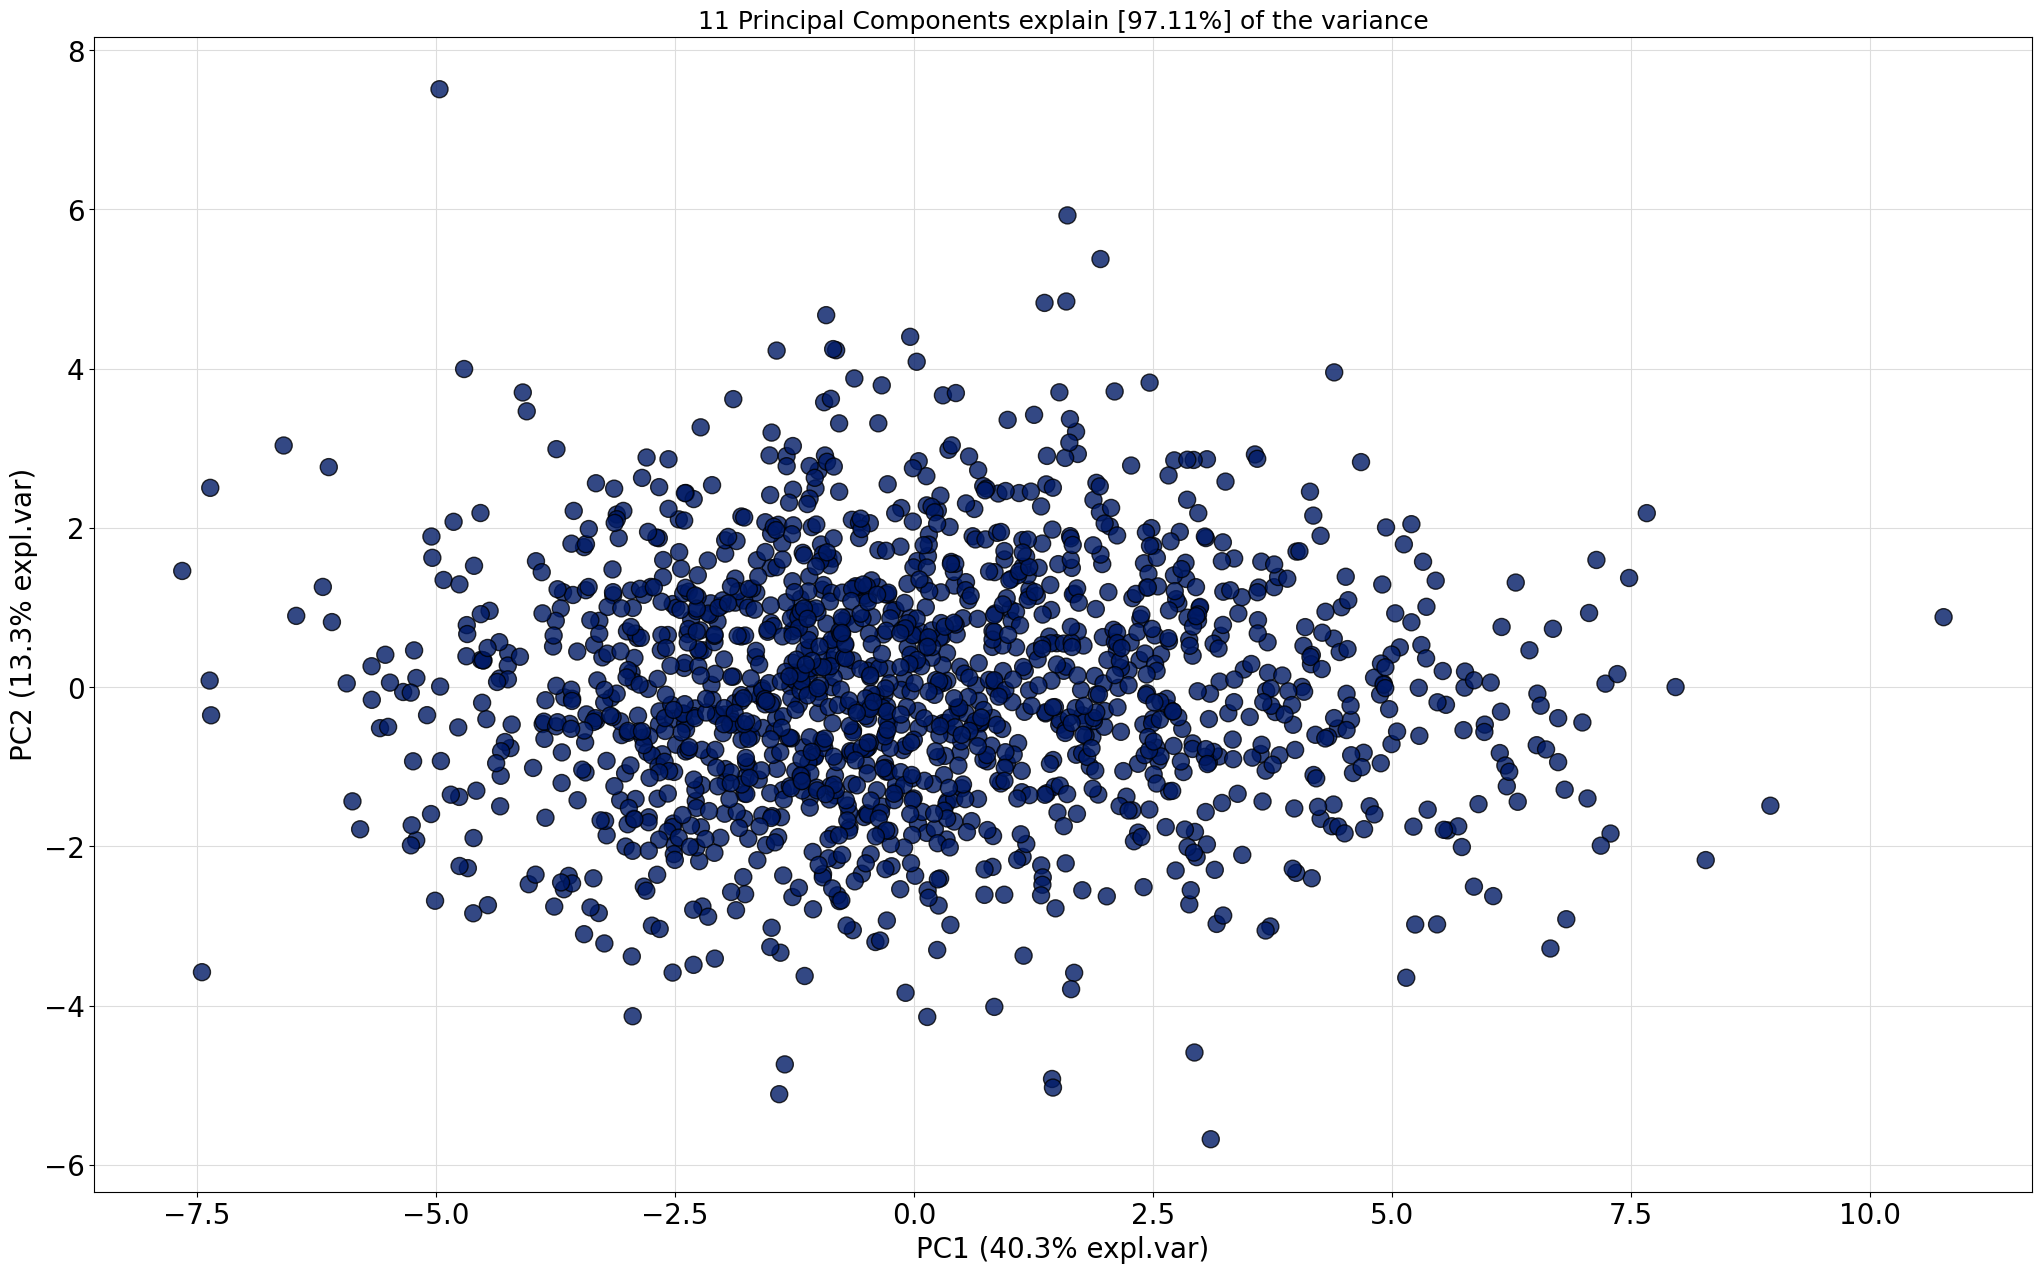

In [254]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 11 Principal Components explain [97.11%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

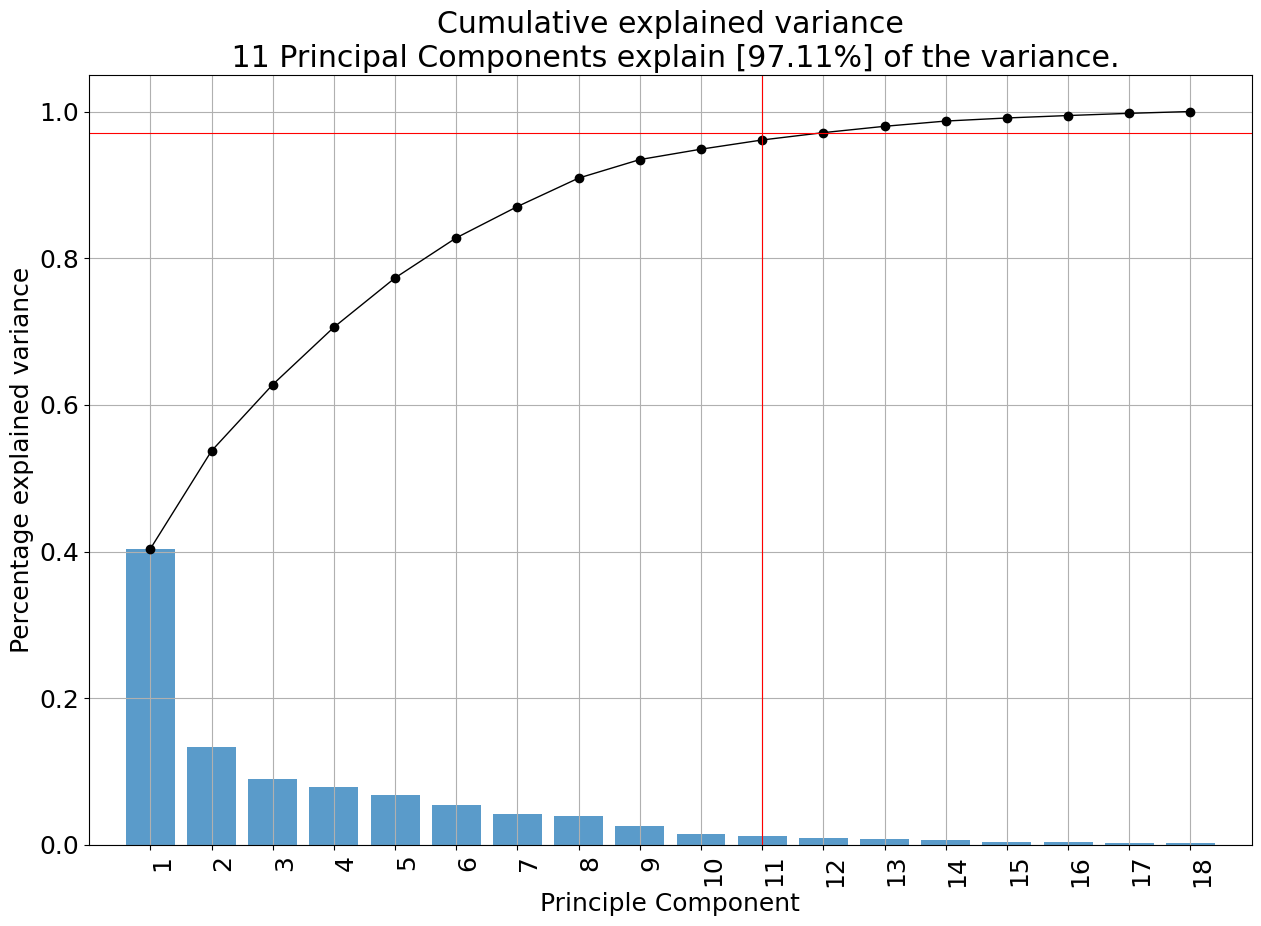

In [255]:
model.plot()

(array([ 12.,  67., 248., 438., 344., 236., 110.,  49.,   9.,   2.]),
 array([-7.65510628, -5.81227254, -3.96943879, -2.12660505, -0.28377131,
         1.55906244,  3.40189618,  5.24472993,  7.08756367,  8.93039742,
        10.77323116]),
 <BarContainer object of 10 artists>)

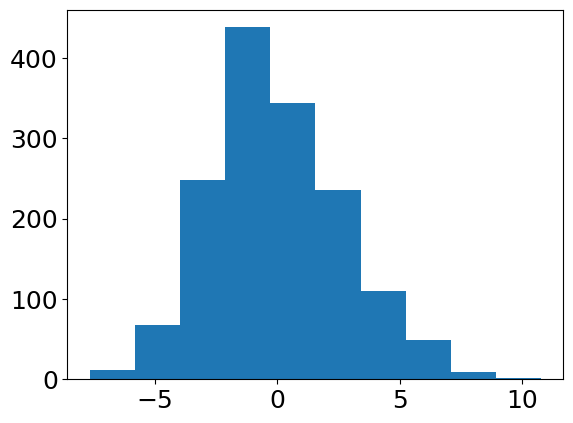

In [256]:
plt.hist(results['PC']['PC1'])

In [257]:
df['QTL_PC1']=results['PC']['PC1']

/tmp/ipykernel_3193824/3693259638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QTL_PC1']=results['PC']['PC1']


In [258]:
df.merge

<bound method DataFrame.merge of             RFID  day11_active_inactive_ratio  slope_nicotine_infusion  \
1     0007D2DDED                    -0.195495                 0.418042   
2     000792A302                    -0.652077                -0.968083   
4     0007D2E752                    -1.057090                -1.766546   
6     000789FF63                     0.000000                 0.493857   
7     00078996BE                     1.003273                 0.132049   
...          ...                          ...                      ...   
2013  0007D3528C                     0.761074                 0.060902   
2014  00078A19AD                    -0.834262                 0.288397   
2015  DD1DCD20E6                    -1.272446                 1.514767   
2016  DD1DCD218B                    -0.057589                 0.174785   
2017  00077E7B73                    -0.916591                 0.581429   

      day3_active_inactive_ratio  day4_activelick  day6_active_inactive_ratio 

In [ ]:
output=df[['RFID','QTL_PC1']].merge(output.drop(['day1_activelick','day1_infusion','first_three_days_infusion_median'],axis=1), on='RFID',how='outer')

In [223]:
output

RFID   QTL_PC1      FAMILY  pc1_smkinit1a_QTL  pc1_smkinit_QTL
0     0007D2DDED -3.670831  0007D2DDED          -1.372526        -1.372526
1     000792A302 -1.979219  000792A302           1.115926         1.115926
2     0007D2E752  3.568236  0007D2E752          -2.225038        -2.225038
3     000789FF63 -3.739721  000789FF63          -0.610885        -0.610885
4     00078996BE -1.029134  00078996BE           2.015487         2.015487
...          ...       ...         ...                ...              ...
2008  0007929C12       NaN  0007929C12           1.821821         1.821821
2009  DD1DCD2319       NaN  DD1DCD2319           0.585663         0.585663
2010  000792A278       NaN  000792A278          -0.204817        -0.204817
2011  0007929A48       NaN  0007929A48          -0.319696        -0.319696
2012  DD1DCD1F41       NaN  DD1DCD1F41           0.897125         0.897125

[2013 rows x 5 columns]

# PCA-cigarettes per day

## all cigday QTL

In [290]:
df=tbl_cigday.dropna(axis='rows')

In [291]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [292]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.16%] of the variance'}, xlabel='PC1 (73.1% expl.var)', ylabel='PC2 (12.6% expl.var)'>)

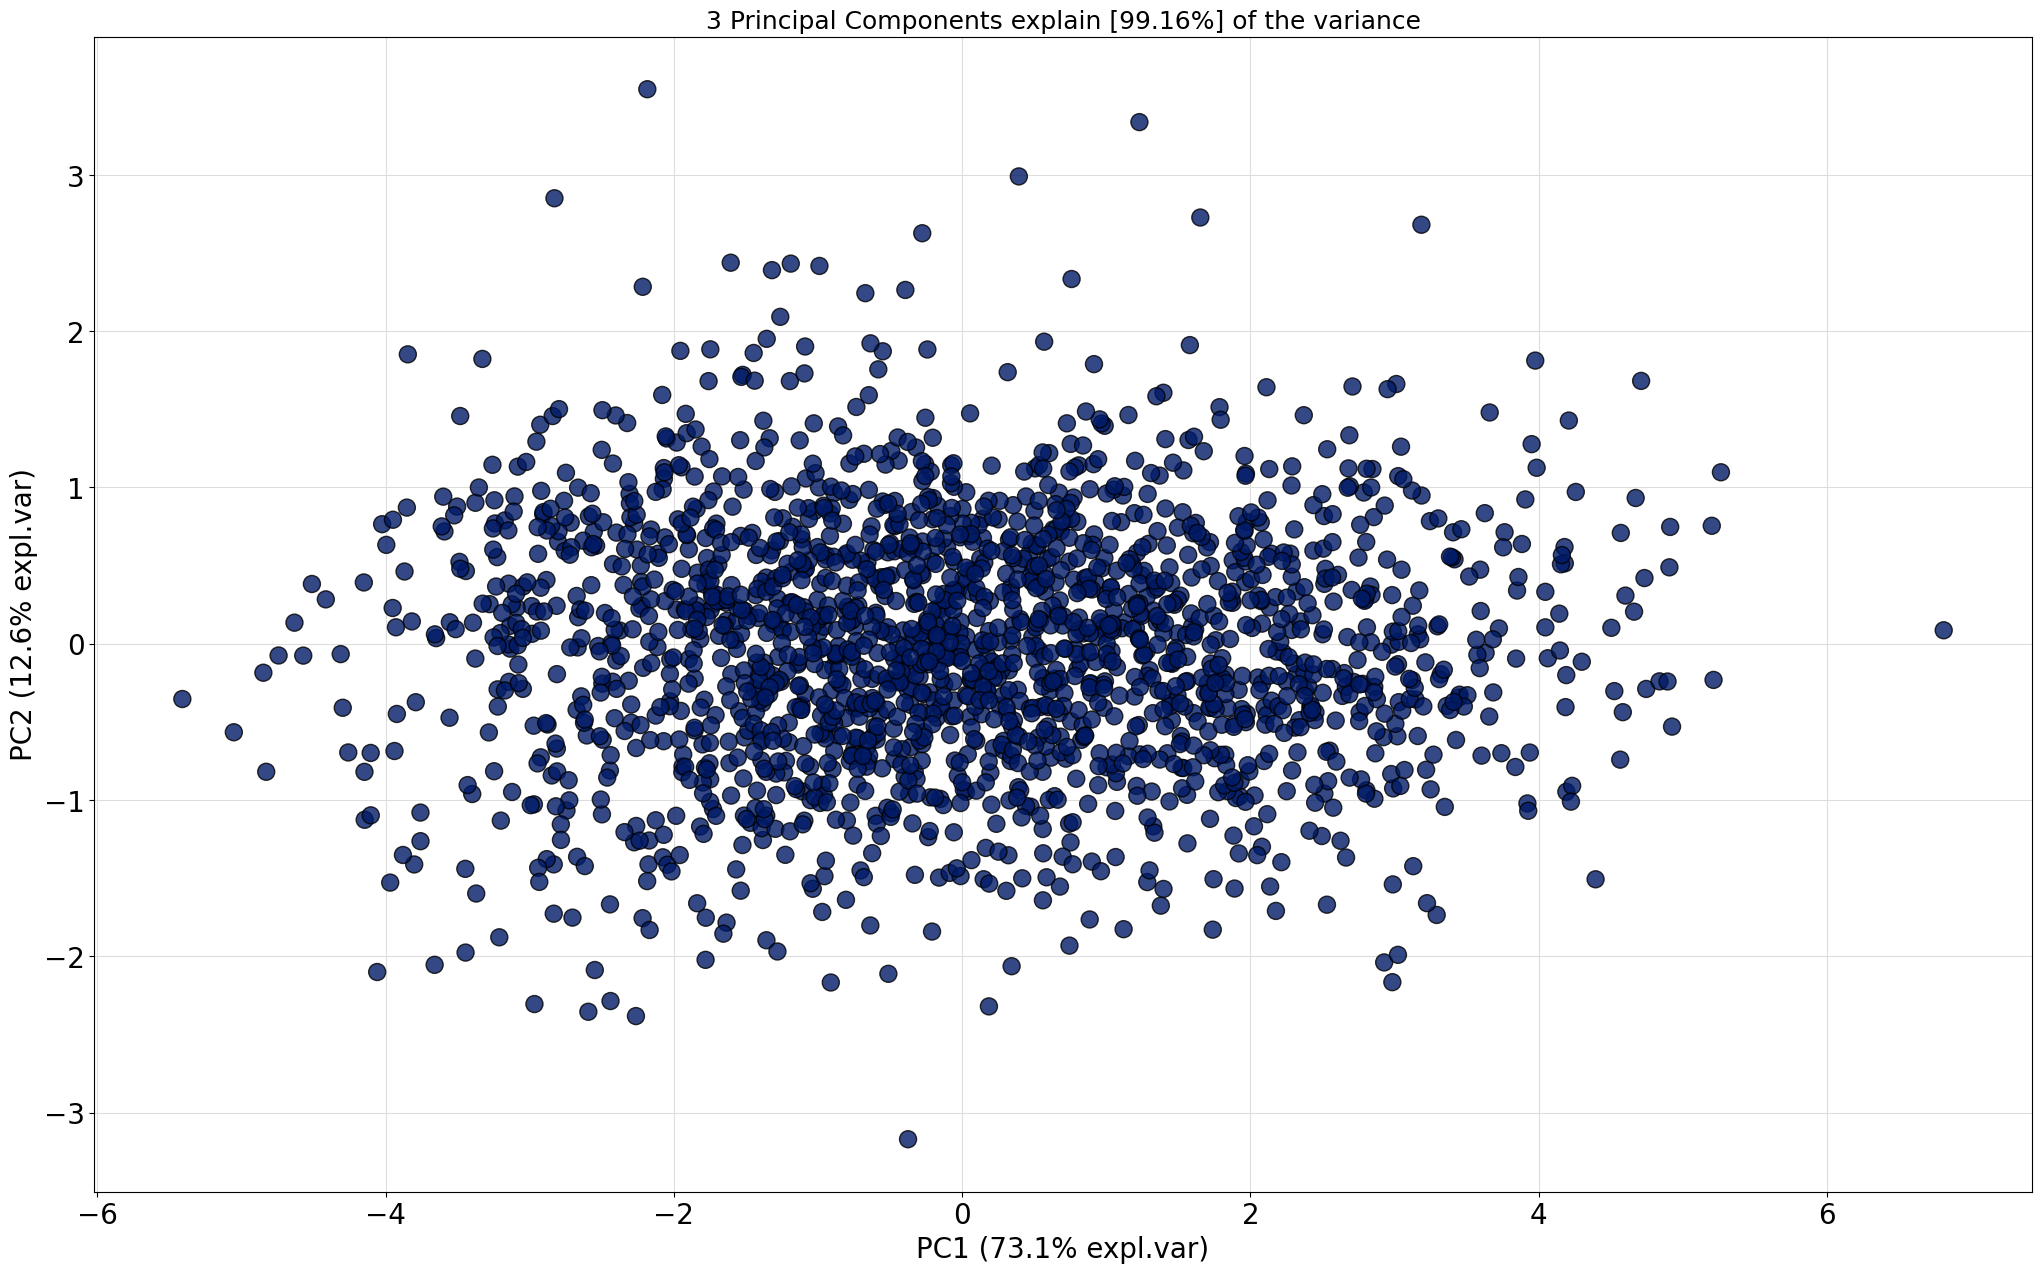

In [293]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 3 Principal Components explain [99.16%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

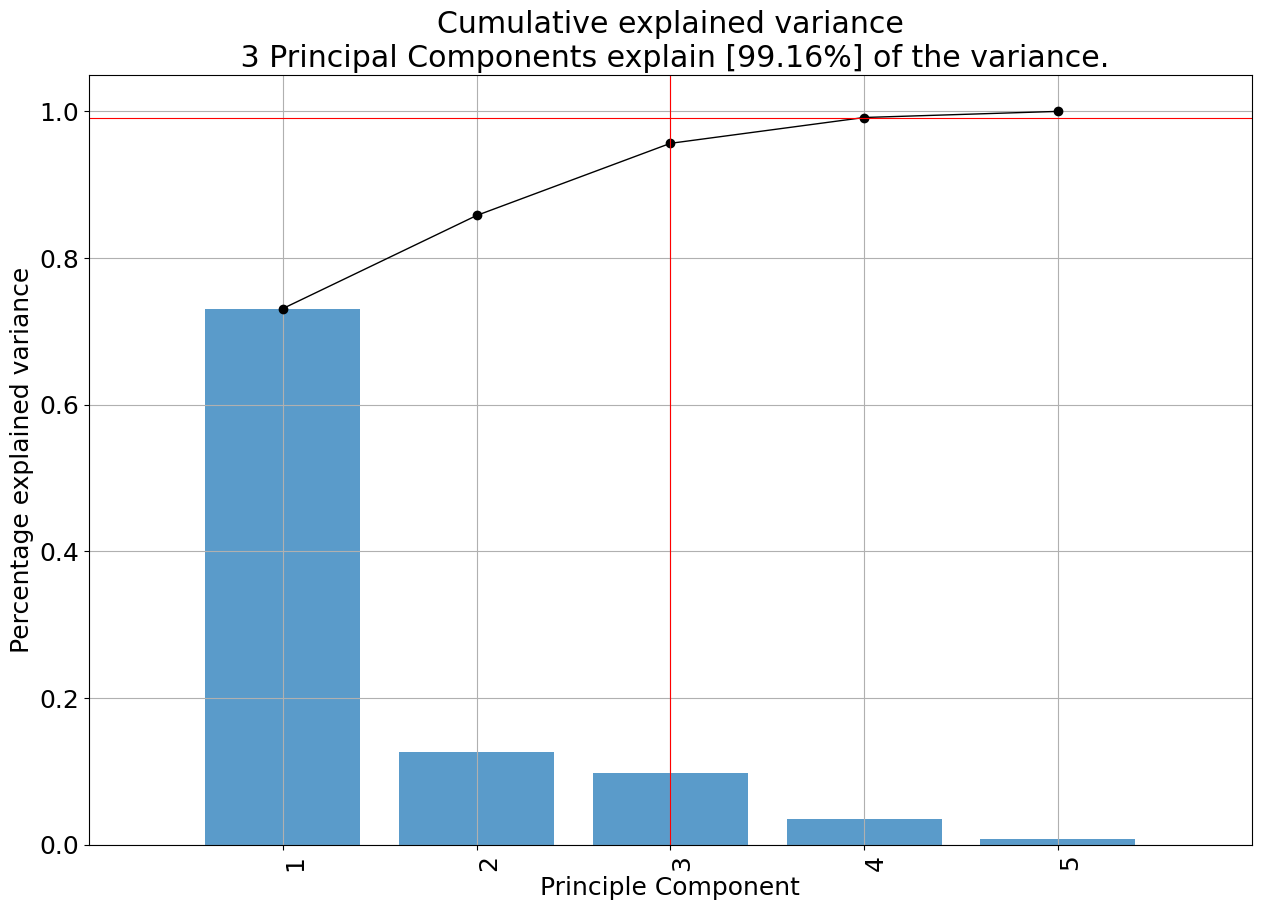

In [294]:
model.plot()

(array([ 12.,  98., 264., 422., 470., 347., 234.,  82.,  20.,   1.]),
 array([-5.4102314 , -4.18821698, -2.96620256, -1.74418814, -0.52217372,
         0.6998407 ,  1.92185512,  3.14386954,  4.36588396,  5.58789838,
         6.8099128 ]),
 <BarContainer object of 10 artists>)

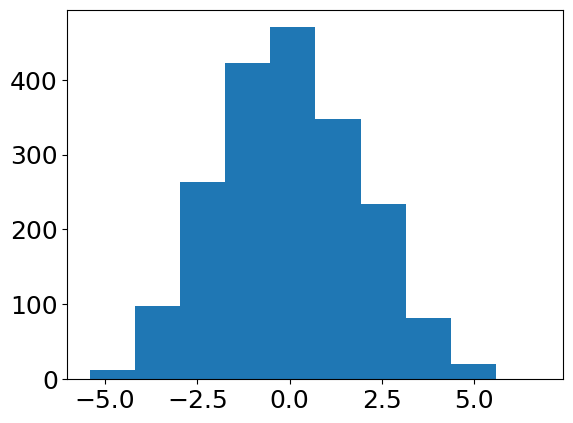

In [295]:
plt.hist(results['PC']['PC1'])

In [296]:
df['pc1_cigday_QTL']=results['PC']['PC1']

/tmp/ipykernel_3193824/660553606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pc1_cigday_QTL']=results['PC']['PC1']


In [297]:
output=df[['RFID','pc1_cigday_QTL']].merge(output, on='RFID',how='outer')

## ciday 1a

In [261]:
df=tbl_cigday[['RFID']+dendo_dict['level1a_ciday']].dropna(axis='rows')

In [262]:
df

RFID  active_inactive_ratio_last_three_median  \
0     00078A008E                                 0.731658   
1     0007D2DDED                                -0.651680   
2     000792A302                                -1.085261   
3     00078A256A                                 0.646921   
4     0007D2E752                                -1.016094   
...          ...                                      ...   
2013  0007D3528C                                 1.029097   
2014  00078A19AD                                 0.267169   
2015  DD1DCD20E6                                -1.137681   
2016  DD1DCD218B                                -0.541133   
2017  00077E7B73                                -1.688917   

      active_inactive_ratio_all_days  
0                           0.873542  
1                          -1.321812  
2                          -1.307085  
3                           1.195740  
4                          -2.311552  
...                              ...  
2013                        1.046792  
2014                       -0.106350  
2015                       -0.554123  
2016                       -0.061494  
2017                       -1.899840  

[1950 rows x 3 columns]

In [263]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [264]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [2] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (84.9% expl.var)', ylabel='PC2 (15.0% expl.var)'>)

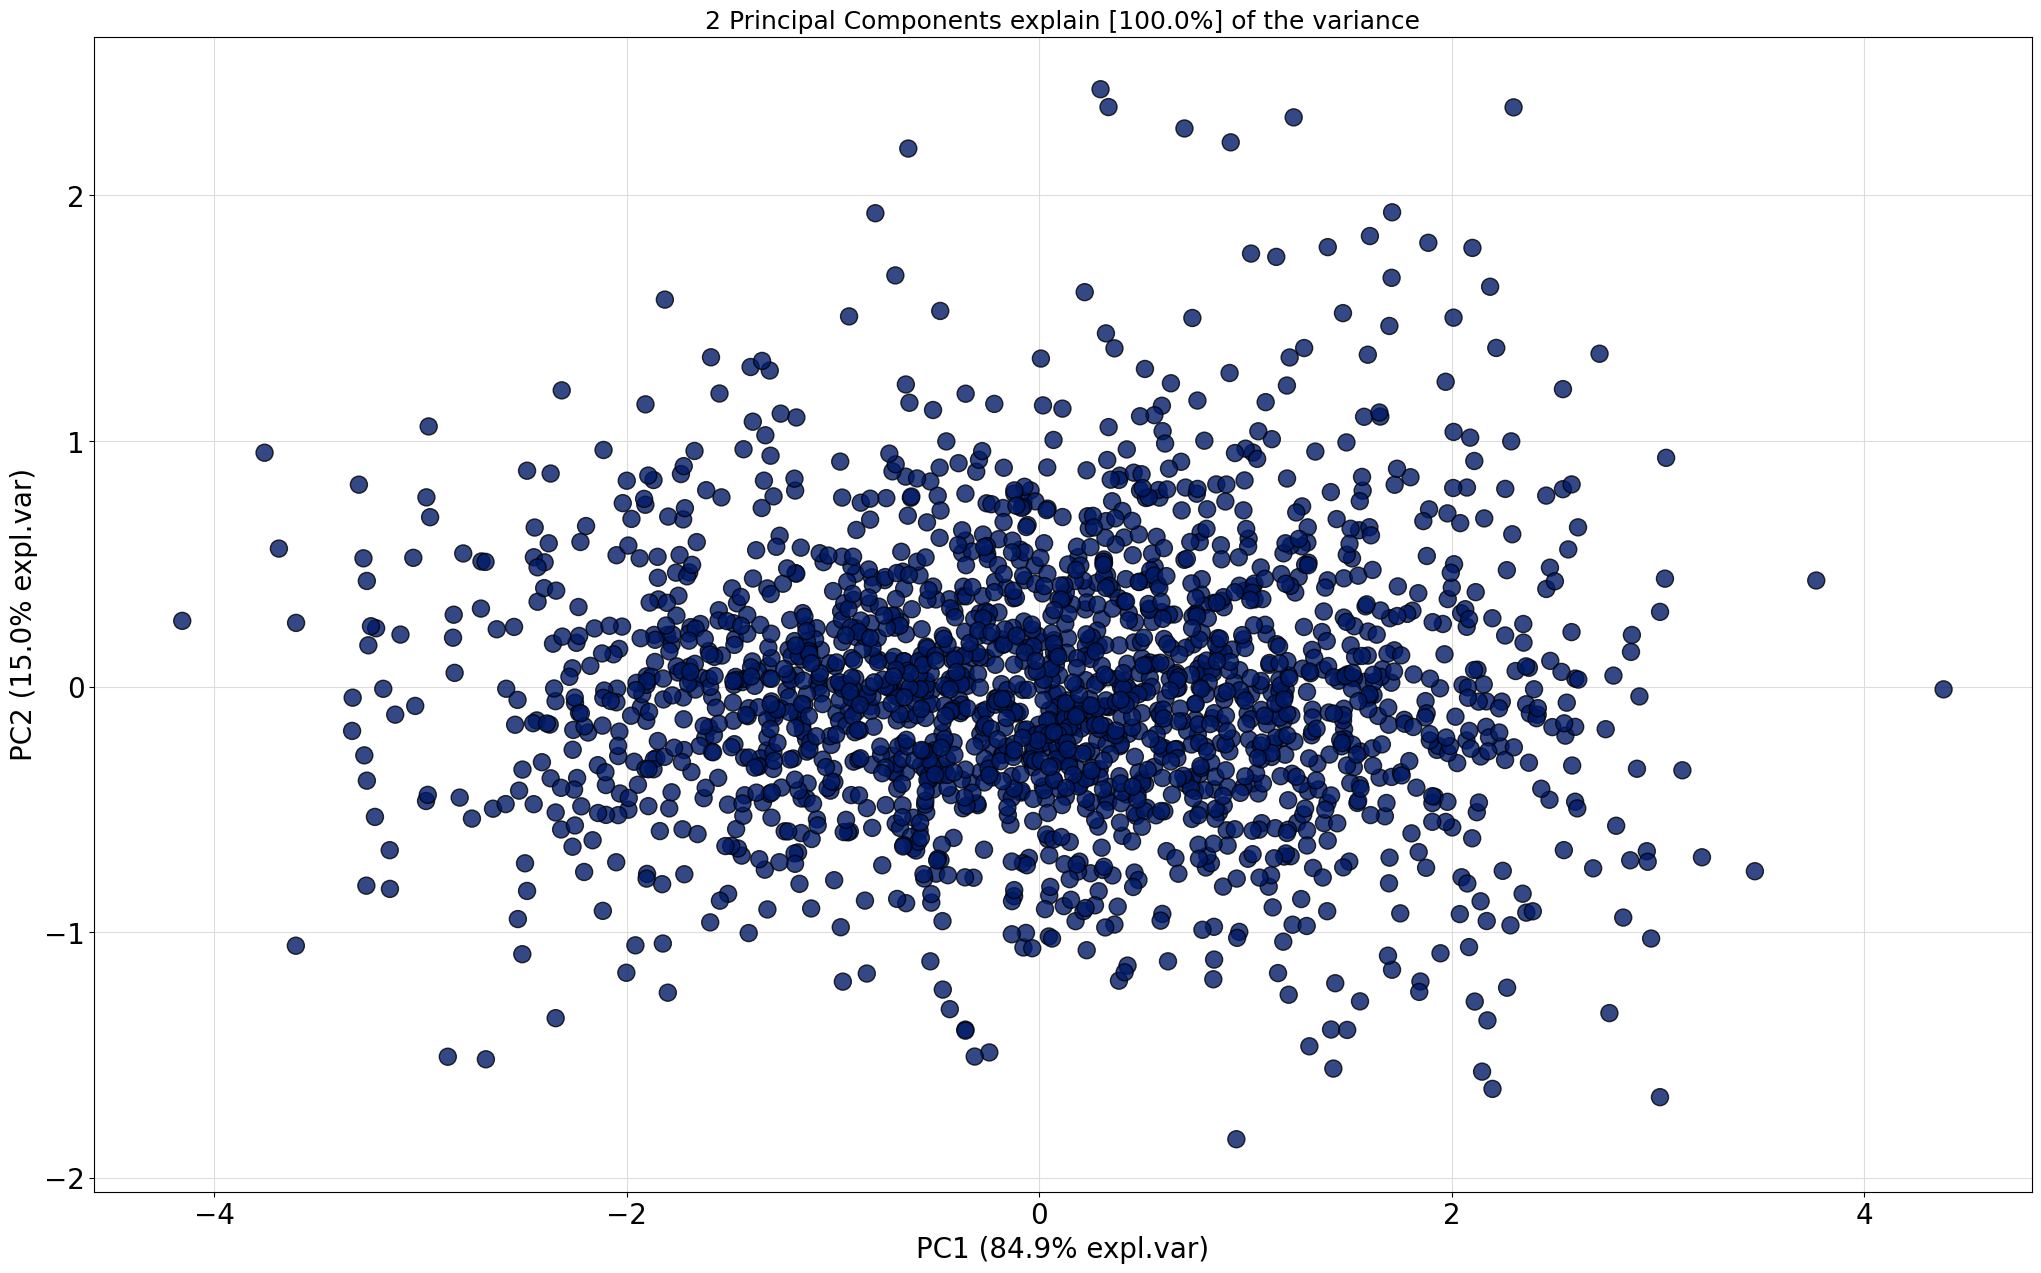

In [265]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 2 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

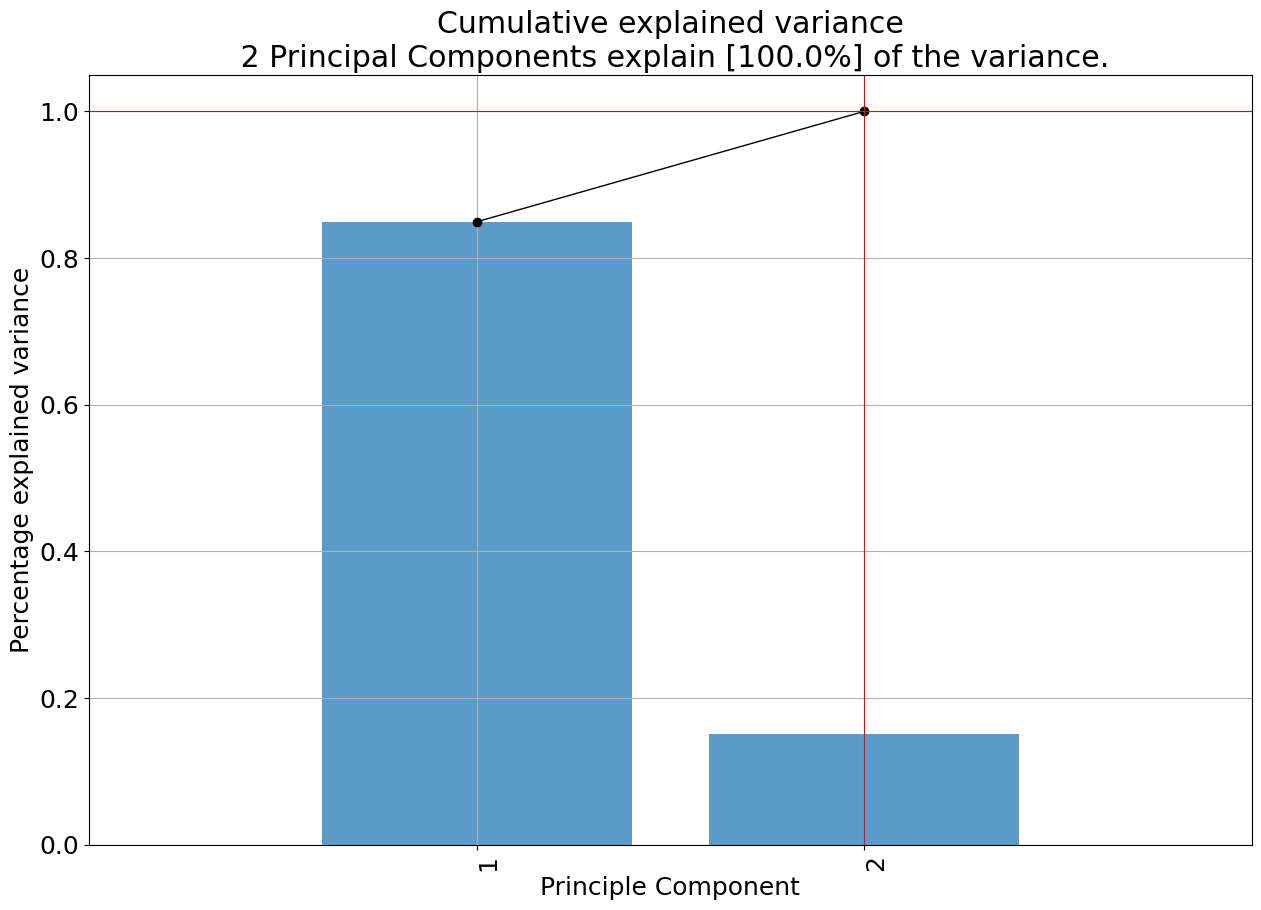

In [266]:
model.plot()

(array([  7.,  50., 183., 308., 474., 464., 299., 141.,  22.,   2.]),
 array([-4.15523969, -3.30112091, -2.44700213, -1.59288335, -0.73876457,
         0.11535421,  0.96947299,  1.82359177,  2.67771055,  3.53182934,
         4.38594812]),
 <BarContainer object of 10 artists>)

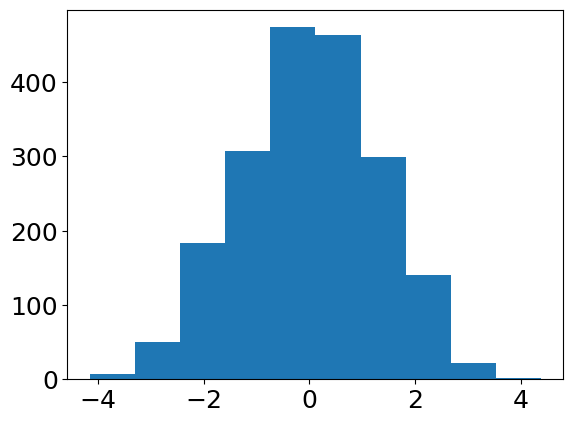

In [267]:
plt.hist(results['PC']['PC1'])

In [272]:
df['pc1_cigday1a_QTL']=results['PC']['PC1']

In [278]:
output=output.drop(['day1_activelick','day1_infusion'],axis=1)

In [276]:
output=df[['RFID','pc1_cigday1a_QTL']].merge(output, on='RFID',how='outer')

## cigday 2a

In [280]:
df=tbl_cigday[['RFID']+dendo_dict['level2a_ciday']].dropna(axis='rows')

In [281]:
df

RFID  active_inactive_ratio_last_three_median  \
0     00078A008E                                 0.731658   
1     0007D2DDED                                -0.651680   
2     000792A302                                -1.085261   
3     00078A256A                                 0.646921   
4     0007D2E752                                -1.016094   
...          ...                                      ...   
2013  0007D3528C                                 1.029097   
2014  00078A19AD                                 0.267169   
2015  DD1DCD20E6                                -1.137681   
2016  DD1DCD218B                                -0.541133   
2017  00077E7B73                                -1.688917   

      active_inactive_ratio_all_days  last_three_days_infusion_median  
0                           0.873542                         1.050546  
1                          -1.321812                         0.504272  
2                          -1.307085                        -0.794103  
3                           1.195740                        -0.547668  
4                          -2.311552                        -1.657158  
...                              ...                              ...  
2013                        1.046792                         0.900528  
2014                       -0.106350                         0.958743  
2015                       -0.554123                        -0.175990  
2016                       -0.061494                         0.574205  
2017                       -1.899840                        -0.933128  

[1950 rows x 4 columns]

In [282]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [283]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (74.3% expl.var)', ylabel='PC2 (16.1% expl.var)'>)

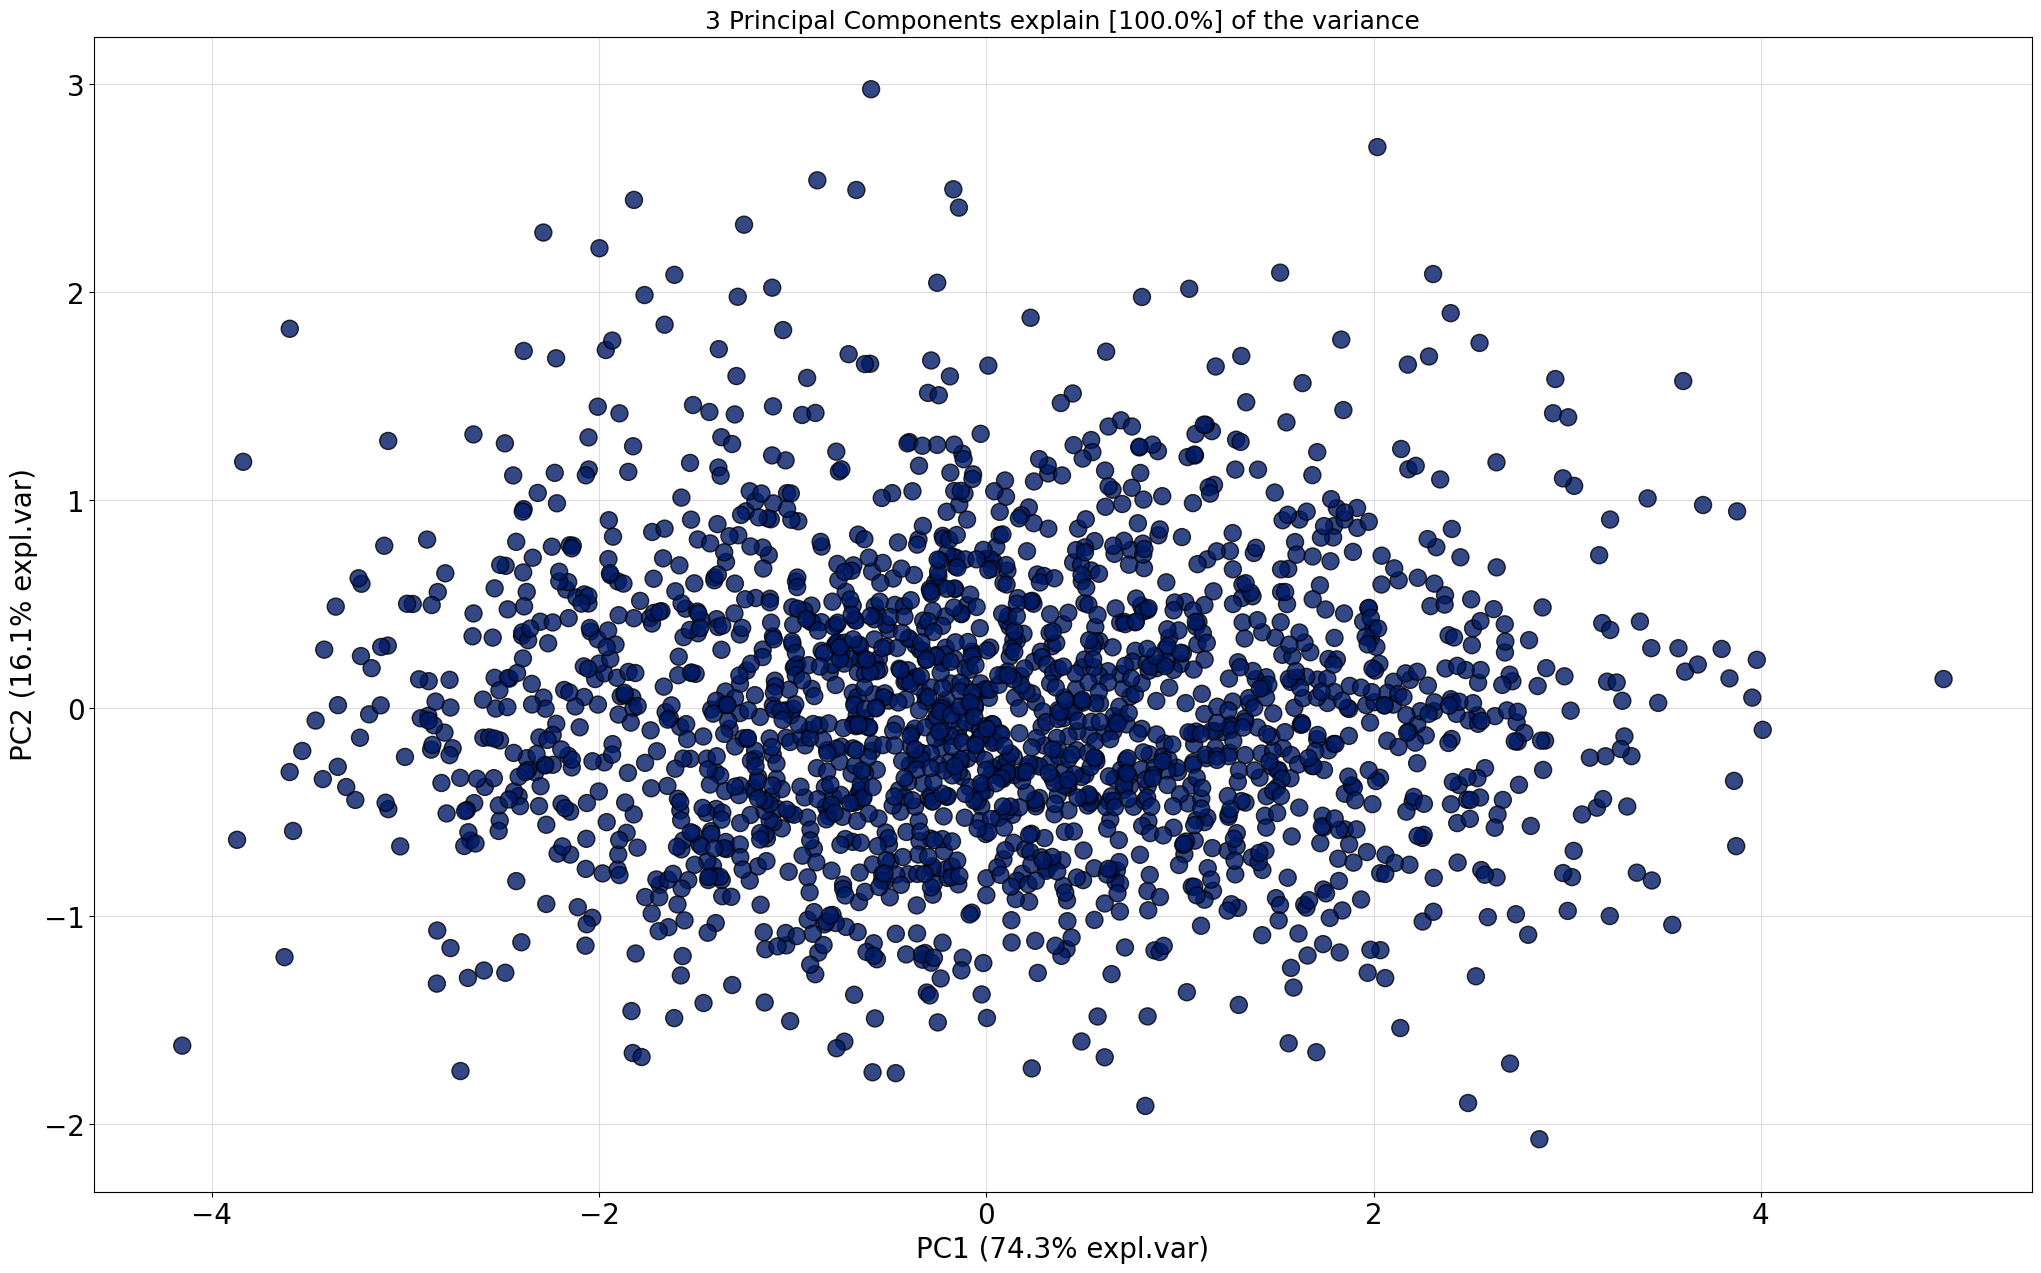

In [284]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 3 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

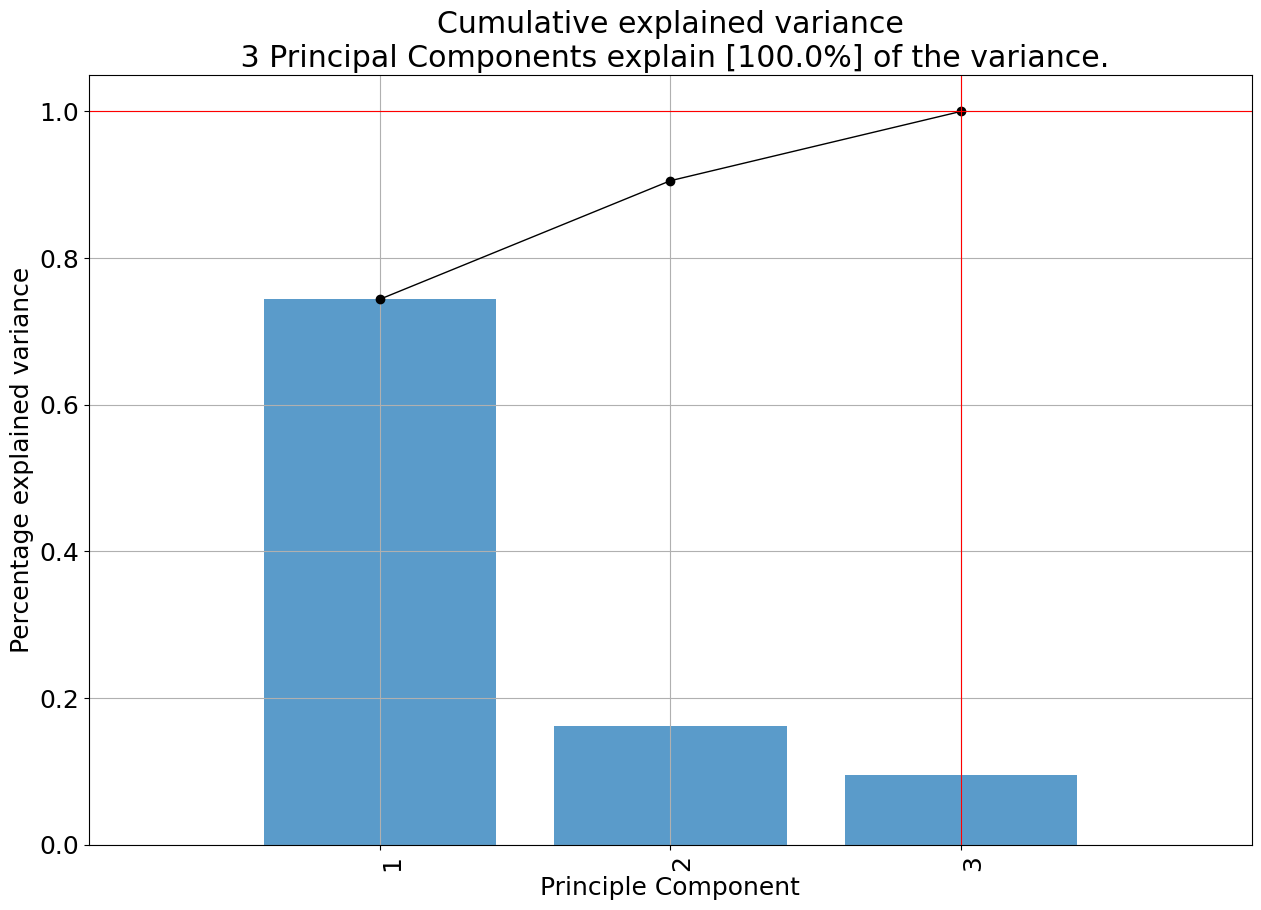

In [285]:
model.plot()

(array([ 16., 106., 216., 390., 465., 361., 242., 118.,  35.,   1.]),
 array([-4.15318101, -3.24350189, -2.33382277, -1.42414366, -0.51446454,
         0.39521457,  1.30489369,  2.2145728 ,  3.12425192,  4.03393103,
         4.94361015]),
 <BarContainer object of 10 artists>)

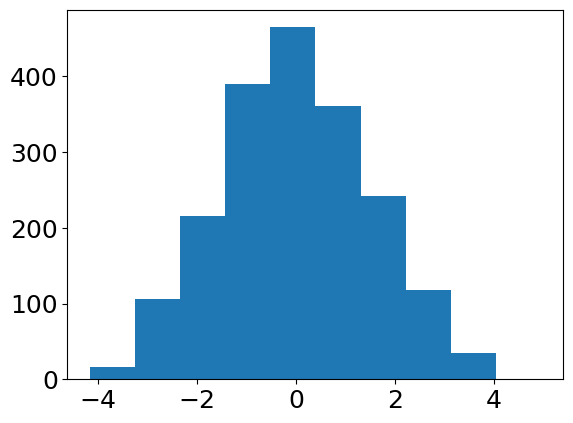

In [286]:
plt.hist(results['PC']['PC1'])

In [287]:
df['pc1_cigday2a_QTL']=results['PC']['PC1']

In [288]:
output=df[['RFID','pc1_cigday2a_QTL']].merge(output, on='RFID',how='outer')

# export pcs

In [301]:
phenopath='nicsa_gwas/data/pheno/'

## export smkinit subset and PCs

In [306]:
output.insert(1, "FAMILY", list(output['RFID']), True)

In [307]:
output

RFID      FAMILY  pc1_cigday_QTL  pc1_cigday2a_QTL  \
0     00078A008E  00078A008E        1.604860          1.531938   
1     0007D2DDED  0007D2DDED       -0.993575         -0.883787   
2     000792A302  000792A302       -1.778902         -1.851206   
3     00078A256A  00078A256A        1.338782          0.790115   
4     0007D2E752  0007D2E752       -3.278601         -2.867800   
...          ...         ...             ...               ...   
2013  0007D3A147  0007D3A147             NaN               NaN   
2014  00078A1746  00078A1746             NaN               NaN   
2015  DD1DCD2160  DD1DCD2160             NaN               NaN   
2016  00078A24F6  00078A24F6             NaN               NaN   
2017  DD1DCD2185  DD1DCD2185             NaN               NaN   

      pc1_cigday1a_QTL  pc1_smkinit1a_QTL  pc1_smkinit_QTL  
0            -1.148274          -2.344311        -2.349764  
1             1.398287          -1.372526        -1.277382  
2             1.695421           1.115926         0.382282  
3            -1.317846          -0.753294        -0.644311  
4             2.362427          -2.225038        -2.320172  
...                ...                ...              ...  
2013               NaN          -1.262012        -1.381914  
2014               NaN           1.345303         0.748427  
2015               NaN           1.239873         1.576571  
2016               NaN           0.844482         0.334437  
2017               NaN          -1.583861        -1.488524  

[2018 rows x 7 columns]

In [308]:
for r in output.columns[2:]:
    df_out=output[['FAMILY','RFID',r]]
    print(df_out.head())
    p=phenopath+'regressedlr_nicsa_'+r+'.txt'
    print(p)
    df_out.to_csv(p, sep=' ',header=None)

       FAMILY        RFID  pc1_cigday_QTL
0  00078A008E  00078A008E        1.604860
1  0007D2DDED  0007D2DDED       -0.993575
2  000792A302  000792A302       -1.778902
3  00078A256A  00078A256A        1.338782
4  0007D2E752  0007D2E752       -3.278601
nicsa_gwas/data/pheno/regressedlr_nicsa_pc1_cigday_QTL.txt
       FAMILY        RFID  pc1_cigday2a_QTL
0  00078A008E  00078A008E          1.531938
1  0007D2DDED  0007D2DDED         -0.883787
2  000792A302  000792A302         -1.851206
3  00078A256A  00078A256A          0.790115
4  0007D2E752  0007D2E752         -2.867800
nicsa_gwas/data/pheno/regressedlr_nicsa_pc1_cigday2a_QTL.txt
       FAMILY        RFID  pc1_cigday1a_QTL
0  00078A008E  00078A008E         -1.148274
1  0007D2DDED  0007D2DDED          1.398287
2  000792A302  000792A302          1.695421
3  00078A256A  00078A256A         -1.317846
4  0007D2E752  0007D2E752          2.362427
nicsa_gwas/data/pheno/regressedlr_nicsa_pc1_cigday1a_QTL.txt
       FAMILY        RFID  pc1_smkinit1

# format for gwas

In [310]:
proc=pd.read_csv('nicsa_gwas/processed_data_ready.csv')

In [322]:
allpheno=pd.read_csv('nicsa_gwas/data/allpheno.txt',sep='\t', header=None)

In [21]:
raw_data=pd.read_csv('nicsa_gwas_pc2/raw_data.csv',index_col=0)

In [326]:
raw_data

rfid  nicsa_day1_activelick  nicsa_day1_inactivelick  \
0     00077E7676                   31.0                     52.0   
1     00077E76E8                  188.0                    139.0   
2     00077E76F5                   45.0                    356.0   
3     00077E774B                   49.0                     20.0   
4     00077E777E                   62.0                    119.0   
...          ...                    ...                      ...   
1806  DD1DCD24E2                   14.0                    368.0   
1807  DD1DCD24E4                   47.0                    117.0   
1808  DD1DCD2503                   32.0                    231.0   
1809  DD1DCD250D                   34.0                     73.0   
1810  DD1DCD23AF                   42.0                    182.0   

      nicsa_day1_infusion  nicsa_day2_activelick  nicsa_day2_inactivelick  \
0                     1.0                   11.0                     40.0   
1                     5.0                   18.0                     81.0   
2                     1.0                   19.0                    193.0   
3                     2.0                    3.0                     31.0   
4                     2.0                  348.0                    325.0   
...                   ...                    ...                      ...   
1806                  1.0                   61.0                    184.0   
1807                  2.0                   27.0                    187.0   
1808                  2.0                    1.0                     13.0   
1809                  3.0                    6.0                     22.0   
1810                  1.0                   88.0                    125.0   

      nicsa_day2_infusion  nicsa_day3_activelick  nicsa_day3_inactivelick  \
0                     1.0                   10.0                     41.0   
1                     1.0                   16.0                     57.0   
2                     1.0                    0.0                     22.0   
3                     0.0                  172.0                     13.0   
4                     5.0                  199.0                    204.0   
...                   ...                    ...                      ...   
1806                  3.0                   66.0                     86.0   
1807                  1.0                   46.0                    127.0   
1808                  0.0                   59.0                      9.0   
1809                  0.0                   92.0                     23.0   
1810                  4.0                   95.0                     99.0   

      nicsa_day3_infusion  ...  raw_nicsa_day11_infusion  \
0                     1.0  ...                       0.0   
1                     1.0  ...                       1.0   
2                     0.0  ...                       0.0   
3                     5.0  ...                       2.0   
4                     6.0  ...                       4.0   
...                   ...  ...                       ...   
1806                  2.0  ...                       4.0   
1807                  2.0  ...                       1.0   
1808                  3.0  ...                       1.0   
1809                  3.0  ...                       1.0   
1810                  3.0  ...                       3.0   

      raw_nicsa_day20_activelick  raw_nicsa_day20_inactivelick  \
0                           19.0                           4.0   
1                           68.0                          26.0   
2                          191.0                          23.0   
3                           42.0                          22.0   
4                          191.0                          57.0   
...                          ...                           ...   
1806                        36.0                          62.0   
1807                        28.0                          44.0   
1808                         2

In [327]:
raw_data=raw_data.merge(output.drop('FAMILY',axis=1),left_on='rfid',right_on='RFID',how='outer')
raw_data=raw_data.drop('RFID',axis=1)

In [27]:
raw_data[raw_data.columns[raw_data.columns.str.contains('QTL')]]

pc1_cigday_QTL  pc1_cigday2a_QTL  pc1_cigday1a_QTL  \
rfid                                                             
00077E7676       -0.511843          1.090507         -1.370599   
00077E76E8       -1.838129         -1.478791          1.000357   
00077E76F5        2.607537          1.573200         -0.602546   
00077E774B       -0.257615         -0.283605         -0.153764   
00077E777E        1.036169          0.639854         -0.297692   
...                    ...               ...               ...   
NaN                    NaN               NaN               NaN   
NaN                    NaN               NaN               NaN   
NaN                    NaN               NaN               NaN   
NaN                    NaN               NaN               NaN   
NaN                    NaN               NaN               NaN   

            pc1_smkinit1a_QTL  pc1_smkinit_QTL  
rfid                                            
00077E7676          -0.999814        -1.188714  
00077E76E8           1.139861         0.572877  
00077E76F5          -0.584220        -0.592654  
00077E774B          -0.129741         0.078166  
00077E777E          -0.369941         0.188796  
...                       ...              ...  
NaN                 -1.262012        -1.381914  
NaN                  1.345303         0.748427  
NaN                  1.239873         1.576571  
NaN                  0.844482         0.334437  
NaN                 -1.583861        -1.488524  

[2018 rows x 5 columns]

In [18]:
proc=pd.read_csv('nicsa_gwas_pc2/processed_data_ready.csv')

In [31]:
proc.rfid

0       0007D2D65A
1       00078A09AC
2       0007A3C506
3       0007D60648
4       00078A0530
           ...    
2013    DD1DCD2433
2014    0007D5FD63
2015    0007A3A1F9
2016    000789FFD2
2017    00078A1813
Name: rfid, Length: 2018, dtype: object

In [34]:
proc=proc.merge(raw_data[raw_data.columns[raw_data.columns.str.contains('QTL')]],on='rfid',how='outer')

In [333]:
proc=proc.merge(output.drop('FAMILY',axis=1),left_on='rfid',right_on='RFID',how='outer').drop('RFID',axis=1)

In [334]:
proc

rfid  _2014_vs_2020  cigday_pc1  cigday_pc1_no_covariate  \
0     00078A008E           2014         NaN                      NaN   
1     0007D2DDED           2014   -0.616998                -0.616998   
2     000792A302           2014   -2.772794                -2.772794   
3     00078A256A           2014         NaN                      NaN   
4     0007D2E752           2014   -4.147931                -4.147931   
...          ...            ...         ...                      ...   
2013  0007D3528C           2014    4.331692                 4.331692   
2014  00078A19AD           2014    1.601006                 1.601006   
2015  DD1DCD20E6           2020   -0.786605                -0.786605   
2016  DD1DCD218B           2020    0.132931                 0.132931   
2017  00077E7B73           2014   -5.620902                -5.620902   

      coatcolor cohort                                           comments  \
0     BROWNHOOD    C03  ;active lick greater than 1700, replaced with ...   
1         BROWN    C15                                                NaN   
2         BROWN    C08                                                NaN   
3         BLACK    C04  ;active_inactive ratio greater than 150, repla...   
4         BLACK    C14                                                NaN   
...         ...    ...                                                ...   
2013  BLACKHOOD    C16                                                NaN   
2014      BROWN    C02                                                NaN   
2015      BLACK    C19                                                NaN   
2016      BROWN    C19                                                NaN   
2017      BROWN    C01                                                NaN   

      nicsa_active_inactive_ratio_all_days  \
0                                 7.845992   
1                                 0.121928   
2                                 0.192524   
3                                 3.586387   
4                                 0.075236   
...                                    ...   
2013                              1.891176   
2014                              0.578145   
2015                              0.267668   
2016                              0.608939   
2017                              0.036152   

      nicsa_active_inactive_ratio_first_three_median  \
0                                           1.181818   
1                                           0.063953   
2                                           0.117871   
3                                           1.134328   
4                                           0.058140   
...                                              ...   
2013                                        0.714286   
2014                                        2.884615   
2015                                        0.342105   
2016                                        0.463710   
2017                                        0.063415   

      nicsa_active_inactive_ratio_last_three_median  ...      umap2     umap3  \
0                                         59.366071  ...  10.231929  6.325238   
1                                          0.204545  ...  10.532775  6.036884   
2                                          0.075000  ...  10.863316  5.096773   
3                                          2.336957  ...  10.394057  5.400286   
4                                          0.091837  ...  10.199533  4.199391   
...                                             ...  ...        ...       ...   
2013                                       4.750000  ...  10.185593  5.974106   
2014                                       1.138889  ...  10.917911  6.312006   
2015                                       0.068750  ...   9.898397  4.887038   
2016                                       0.253333  ...  11.709604  6.052450   
2017                                       0.000000  ...   9.694888  4.569193   

      umap_clusters_0  

In [36]:
dict=pd.read_csv('nicsa_gwas/data_dict_p50_hao_chen_nicsa.csv')

In [11]:
dict=dict[dict['trait_covariate']!='trait']

In [37]:
dict

measure        trait_covariate  \
0                                           cohort  covariate_categorical   
1                                        nicsa_age   covariate_continuous   
2                                        coatcolor  covariate_categorical   
3                                              sex  covariate_categorical   
4                                             rfid               metadata   
..                                             ...                    ...   
65         nicsa_first_three_days_activelick_total                  trait   
66          nicsa_last_three_days_activelick_total                  trait   
67  nicsa_active_inactive_ratio_first_three_median                  trait   
68   nicsa_active_inactive_ratio_last_three_median                  trait   
69                            nicsa_day20_infusion                  trait   

                                      covariates  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
..                                           ...   
65  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   
66  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   
67  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   
68  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   
69  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   

                                          description  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
..                                                ...  
65  Central nervous system; behavior: sum of the n...  
66  Central nervous system; behavior: sum of the n...  
67  Central nervous system; behavior: the median o...  
68  Central nervous system; behavior: the median o...  
69  Central nervous system; behavior: this trait h...  

[70 rows x 4 columns]

In [13]:
 output.columns[2:]

NameError: name 'output' is not defined

In [38]:
dict.loc[len(dict.index)] = ['pc1_cigday_qtl', 'trait', 'NaN','pc1 of cigarettes per day for traits with QTLs.']  
dict.loc[len(dict.index)] = ['pc1_cigday2a_qtl', 'trait', 'cohort,nicsa_age,coatcolor,sex,_2014_vs_2020','pc1 of cigarettes per day for traits with QTLs from dendogram.']  
dict.loc[len(dict.index)] = ['pc1_cigday1a_qtl', 'trait', 'NaN','pc1 of cigarettes per day for traits with QTLs from dendogram.']  
dict.loc[len(dict.index)] = ['pc1_smkinit1a_qtl', 'trait', 'cohort,nicsa_age,coatcolor,sex,_2014_vs_2020','pc1 of smoking initation traits with QTLs from dendogram.']  
dict.loc[len(dict.index)] = ['pc1_smkinit_qtl', 'trait', 'cohort,nicsa_age,coatcolor,sex,_2014_vs_2020','pc1 of smoking initation for traits with QTLs.']  

In [15]:
dict

measure        trait_covariate  \
0              cohort  covariate_categorical   
1           nicsa_age   covariate_continuous   
2           coatcolor  covariate_categorical   
3                 sex  covariate_categorical   
4                rfid               metadata   
5       _2014_vs_2020  covariate_categorical   
6            comments               metadata   
7      pc1_cigday_qtl                  trait   
8    pc1_cigday2a_qtl                  trait   
9    pc1_cigday1a_qtl                  trait   
10  pc1_smkinit1a_qtl                  trait   
11    pc1_smkinit_qtl                  trait   

                                      covariates  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   
6                                            NaN   
7                                            NaN   
8   cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   
9                                            NaN   
10  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   
11  cohort,nicsa_age,coatcolor,sex,_2014_vs_2020   

                                          description  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5   states whether the subject is a part of the 20...  
6                                                 NaN  
7     pc1 of cigarettes per day for traits with QTLs.  
8   pc1 of cigarettes per day for traits with QTLs...  
9   pc1 of cigarettes per day for traits with QTLs...  
10  pc1 of smoking initation traits with QTLs from...  
11     pc1 of smoking initation for traits with QTLs.

In [346]:
raw_data.to_csv('nicsa_gwas/raw_data.csv',index=False)

In [35]:
proc.to_csv('nicsa_gwas_pc2/processed_data_ready.csv',index=False)

In [39]:
dict.to_csv('nicsa_gwas_pc2/data_dict_nicsa_gwas_pc2.csv',index=False)

In [40]:
dict.to_csv('data_dict_nicsa_gwas_pc2.csv',index=False)